

**If using CoLab download your data and any necessarey python libraries:**

In [ ]:
using_colab = True

In [ ]:
if using_colab:

    !wget 'https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/data_Nick_HomeDepot_EdChiles2.xlsx'
    !wget 'https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/data_Nick_HomeDepot_white.xlsx'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/sts_nasa.png'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/Spectrum.png'
    !wget 'https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_color.gif'
    !wget 'https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/Plant_colors.png'


    #https://colab.research.google.com/github/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/blob/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb

    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_grass_shade_whiteshade.xlsx
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_FullSun.xlsx


    !pip install ipywidgets
    !pip install --upgrade scikit-learn


![image.png](https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/sts_nasa.png?raw=1)


# **Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer**

The **Science and Technology Society (STS) of Sarasota-Manatee Counties, Florida** is working with the NASA STELLA (Science and Technology Education for Land/Life Assessment) outreach program as a part of our STEM initiative. According to their site,

- "NASA STELLA instruments are portable low-cost do-it-yourself (DIY) instruments that support science education, and outreach through scientific engagement, inquiry, and discovery while helping you understand Landsat better".

**STELLA instruments are developed under the influence and inspiration of Landsat.** This alignment not only fulfills our project needs but also serves as a compelling addition to our STEAM initiatives:

1) To train the minds young Floridians to be more aware of our wetlands, to care for them and about them.  Our program will bring more community publicity to the issue of wetlands change, as well.

2) To expose our middle- and high- school aged students to real science, using real data.  That means how to use instrumentation and understand how the data is collected, and how the data can be used in the real world.  It means not only to create beautiful charts and images that form the good results, but also to understand that data must be collected in a proper and reproducible way, that there physics reasons for lack of accuracy and lack of precision that one must understand and minimize in order to achieve meaningful results.


The NASA STELLA-Q2 is capable of making 18 different spectral measurements from the violet/blue portions of the electromagnetic spectrum out to near infrared regions (beyond our range of vision).The following figure **(1)** shows the visible spectrum by wavelength, and the yellow box indicates the STELLA-Q2 frequency range.

>![image](https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/Spectrum.png?raw=1)


More can be found on the STELLA DIY instruments at the following link.

>https://landsat.gsfc.nasa.gov/stella/

The following is a sample-by-sample animation of the type of data acquired from STELLA-Q2 Spectrometer built by STS. STS is providing the python code in a Jupyter Notebook that can be used as an example of how to display the data from the STELLA-Q2 device. We have also provided some sample data to be used with this notebook. It should be noted that we did change the name of some of the headers created from our instrument to add colors to each of the wavelength reading that are made in order to display each wavelength as a corresponding color. The near infrared wavelength readings are colored in grays, wheat and gold where the normal visible spectrum colors are in vivid colors that they represent.

>
>![image](https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/STELLA_color.gif?raw=1)
>



### Load Python requirments:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import ipywidgets as widgets
from IPython.display import display

#######%matplotlib widget



# **1) Load the Excel data file in xlsx format collected on the STELLA-Q2 micro SD card:**
---

You will notice that we add a few additional columns to these data:
- One column is called "Test" that is label for our STELLA target for that reading
- We have another column called "ImageName" that is that path and file name to any photos representing that reading - optional
- We also have added a column called "Test_number" used for time series plotting - optional

In [ ]:
#read the file
file = r'data_Nick_HomeDepot_EdChiles2.xlsx'
df = pd.read_excel(file,index_col=False)

# Remove leading/trailing whitespaces in column names
df.columns = df.columns.str.strip()
df.head()

device_type software_version   UID  Test_number  Test          ImageName  \
0   STELLA-Q2            2.4.0  6858            0  Palm  ./photos/Palm.jpg   
1   STELLA-Q2            2.4.0  6858            1  Palm  ./photos/Palm.jpg   
2   STELLA-Q2            2.4.0  6858            2  Palm  ./photos/Palm.jpg   
3   STELLA-Q2            2.4.0  6858            3  Palm  ./photos/Palm.jpg   
4   STELLA-Q2            2.4.0  6858            4  Palm  ./photos/Palm.jpg   

   batch  weekday  timestamp_iso8601  decimal_hour  ...  \
0      1   Friday   20240531T201526Z       20.2572  ...   
1      1   Friday   20240531T201529Z       20.2580  ...   
2      1   Friday   20240531T201532Z       20.2589  ...   
3      1   Friday   20240531T201534Z       20.2594  ...   
4      1   Friday   20240531T201535Z       20.2597  ...   

   irradiance_900nm_wheat_wavelength_nm  \
0                                   900   
1                                   900   
2                                   900   
3                                   900   
4                                   900   

   irradiance_900nm_wheat_wavelength_uncertainty_nm  \
0                                                10   
1                                                10   
2                                                10   
3                                                10   
4                                                10   

   irradiance_900nm_wheat_irradiance_uW_per_cm_squared  \
0                                            1930.44     
1                                            1934.33     
2                                            1936.55     
3                                            1848.19     
4                                            1869.31     

   irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared  \
0                                            231.652                 
1                                            232.119                 
2                                            232.386                 
3                                            221.783                 
4                                            224.317                 

   irradiance_940nm_gold_wavelength_nm  \
0                                  940   
1                                  940   
2                                  940   
3                                  940   
4                                  940   

   irradiance_940nm_gold_wavelength_uncertainty_nm  \
0                                               10   
1                                               10   
2                                               10   
3                                               10   
4                                               10   

   irradiance_940nm_gold_irradiance_uW_per_cm_squared  \
0                                            879.704    
1                                            859.410    
2                                            930.880    
3                                            854.998    
4                                            923.822    

   irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared  \
0                                            105.564                
1                                            103.129                
2                                            111.706                
3                                            102.600                
4                                            110.859                

   battery_voltage  battery_percent  
0             4.12               92  
1             4.12               92  
2             4.11               92  
3             4.12               92  
4             4.12               92  

[5 rows x 86 columns]

# **2) Read in only the _First Line_ of average White-Card data for full-sun normailzation:**
---


In [ ]:
#read the file
file = r'data_Nick_HomeDepot_white.xlsx'
white = pd.read_excel(file,index_col=False, nrows=1)

# Remove leading/trailing whitespaces in column names
white.columns = white.columns.str.strip()
white.head()

device_type software_version   UID        Test  batch  weekday  \
0     Average            2.4.0  6858  White Card     17   Friday   

   timestamp_iso8601  decimal_hour  bandwidth_FWHM_nm  field_of_view_FWHM_DEG  \
0   20240531T202709Z     20.454573                 20                      20   

   ...  irradiance_900nm_wheat_wavelength_nm  \
0  ...                                   900   

   irradiance_900nm_wheat_wavelength_uncertainty_nm  \
0                                                10   

   irradiance_900nm_wheat_irradiance_uW_per_cm_squared  \
0                                        4477.120909     

   irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared  \
0                                         537.254545                 

   irradiance_940nm_gold_wavelength_nm  \
0                                  940   

   irradiance_940nm_gold_wavelength_uncertainty_nm  \
0                                               10   

   irradiance_940nm_gold_irradiance_uW_per_cm_squared  \
0                                        2717.640909    

   irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared  \
0                                         326.116909                

   battery_voltage  battery_percent  
0         4.118182               92  

[1 rows x 84 columns]

# **3) Define the colors and labels for the STELLA Test Patterns for this project in the cell below:**
---
**This is Test Case specific for your data.**

In [ ]:
# Define Name and Colors for each unique value in the 'Test' column
test_colors = {
            'Palm':'lime',
            'Broad Leaf':'orange',
            'Piney':'aquamarine',
            'Big Leaf':'lightgray',
            'Coral':'salmon',
            'More Green Plant':'gold',
            'Green Plant':'violet',
            'Yellow Shrub':'yellow',
            'Red Broad Leaf':'red',
            'Vgreen':'green',
            'Red Plant':'blue',
            'Leafy':'deepskyblue',
            'Pink Flower':'pink',
            'White Card':'black'
            }

# This is for Knn most frequent choice
# Get the test pattern names right from your STELLA data
def which_is_most_frequent(List):
    #print(most_frequent(List))
    if most_frequent(List) == 1:
        test_pattern_knn.append('Palm')
    elif most_frequent(List) == 2:
        test_pattern_knn.append('Broad Leaf')
    elif most_frequent(List) == 3:
        test_pattern_knn.append('Piney')
    elif most_frequent(List) == 4:
        test_pattern_knn.append('Big Leaf')
    elif most_frequent(List) == 5:
        test_pattern_knn.append('Coral')
    elif most_frequent(List) == 6:
        test_pattern_knn.append('Piny Green')
    elif most_frequent(List) == 7:
        test_pattern_knn.append('More Green Plant')
    elif most_frequent(List) == 8:
        test_pattern_knn.append('Green Plant')
    elif most_frequent(List) == 9:
        test_pattern_knn.append('Yellow Shrub')
    elif most_frequent(List) == 10:
        test_pattern_knn.append('Red Broad Leaf')
    elif most_frequent(List) == 11:
        test_pattern_knn.append('Vgreen')
    elif most_frequent(List) == 12:
        test_pattern_knn.append('Red Plant')
    elif most_frequent(List) == 13:
        test_pattern_knn.append('Leafy')
    elif most_frequent(List) == 14:
        test_pattern_knn.append('Pink Flower')
    elif most_frequent(List) == 15:
        test_pattern_knn.append('White Card')


## Explore the data:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 86 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   device_type                                                           47 non-null     object 
 1   software_version                                                      47 non-null     object 
 2   UID                                                                   47 non-null     int64  
 3   Test_number                                                           47 non-null     int64  
 4   Test                                                                  47 non-null     object 
 5   ImageName                                                             47 non-null     object 
 6   batch                                                                 47 non-null     int64  
 7   w

## We did alter the original code.py file on the STELLA-Q2 to use actual color names for the following column data vs. *near IR* as in the original STELLA-Q2 code.py code file.

     49   irradiance_680nm_black_wavelength_nm                                  60 non-null     int64  
     50   irradiance_680nm_black_wavelength_uncertainty_nm                      60 non-null     int64  
     51   irradiance_680nm_black_irradiance_uW_per_cm_squared                   60 non-null     float64
     52   irradiance_680nm_black_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     53   irradiance_705nm_brown_wavelength_nm                                  60 non-null     int64  
     54   irradiance_705nm_brown_wavelength_uncertainty_nm                      60 non-null     int64  
     55   irradiance_705nm_brown_irradiance_uW_per_cm_squared                   60 non-null     float64
     56   irradiance_705nm_brown_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     57   irradiance_730nm_gray_wavelength_nm                                   60 non-null     int64  
     58   irradiance_730nm_gray_wavelength_uncertainty_nm                       60 non-null     int64  
     59   irradiance_730nm_gray_irradiance_uW_per_cm_squared                    60 non-null     float64
     60   irradiance_730nm_gray_irradiance_uncertainty_uW_per_cm_squared        60 non-null     float64
     61   irradiance_760nm_silver_wavelength_nm                                 60 non-null     int64  
     62   irradiance_760nm_silver_wavelength_uncertainty_nm                     60 non-null     int64  
     63   irradiance_760nm_silver_irradiance_uW_per_cm_squared                  60 non-null     float64
     64   irradiance_760nm_silver_irradiance_uncertainty_uW_per_cm_squared      60 non-null     float64
     65   irradiance_810nm_lightgray_wavelength_nm                              60 non-null     int64  
     66   irradiance_810nm_lightgray_wavelength_uncertainty_nm                  60 non-null     int64  
     67   irradiance_810nm_lightgray_irradiance_uW_per_cm_squared               60 non-null     float64
     68   irradiance_810nm_lightgray_irradiance_uncertainty_uW_per_cm_squared   60 non-null     float64
     69   irradiance_860nm_linen_wavelength_nm                                  60 non-null     int64  
     70   irradiance_860nm_linen_wavelength_uncertainty_nm                      60 non-null     int64  
     71   irradiance_860nm_linen_irradiance_uW_per_cm_squared                   60 non-null     float64
     72   irradiance_860nm_linen_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     73   irradiance_900nm_wheat_wavelength_nm                                  60 non-null     int64  
     74   irradiance_900nm_wheat_wavelength_uncertainty_nm                      60 non-null     int64  
     75   irradiance_900nm_wheat_irradiance_uW_per_cm_squared                   60 non-null     float64
     76   irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     77   irradiance_940nm_gold_wavelength_nm                                   60 non-null     int64  
     78   irradiance_940nm_gold_wavelength_uncertainty_nm                       60 non-null     int64  
     79   irradiance_940nm_gold_irradiance_uW_per_cm_squared                    60 non-null     float64
     80   irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared        60 non-null     float64


In [ ]:
df.describe()

UID  Test_number      batch  decimal_hour  bandwidth_FWHM_nm  \
count    47.0    47.000000  47.000000     47.000000               47.0   
mean   6858.0    23.000000   8.744681     20.340587               20.0   
std       0.0    13.711309   5.272851      0.051365                0.0   
min    6858.0     0.000000   1.000000     20.257200               20.0   
25%    6858.0    11.500000   3.000000     20.295400               20.0   
50%    6858.0    23.000000  10.000000     20.352800               20.0   
75%    6858.0    34.500000  13.000000     20.379550               20.0   
max    6858.0    46.000000  17.000000     20.454573               20.0   

       field_of_view_FWHM_DEG  irradiance_410nm_purple_wavelength_nm  \
count                    47.0                                   47.0   
mean                     20.0                                  410.0   
std                       0.0                                    0.0   
min                      20.0                                  410.0   
25%                      20.0                                  410.0   
50%                      20.0                                  410.0   
75%                      20.0                                  410.0   
max                      20.0                                  410.0   

       irradiance_410nm_purple_wavelength_uncertainty_nm  \
count                                               47.0   
mean                                                10.0   
std                                                  0.0   
min                                                 10.0   
25%                                                 10.0   
50%                                                 10.0   
75%                                                 10.0   
max                                                 10.0   

       irradiance_410nm_purple_irradiance_uW_per_cm_squared  \
count                                          47.000000      
mean                                         2383.746944      
std                                          1559.176205      
min                                          1482.240000      
25%                                          1828.980000      
50%                                          2026.810000      
75%                                          2515.645000      
max                                         12425.436364      

       irradiance_410nm_purple_irradiance_uncertainty_uW_per_cm_squared  ...  \
count                                          47.000000                 ...   
mean                                          286.049638                 ...   
std                                           187.100815                 ...   
min                                           177.869000                 ...   
25%                                           219.477500                 ...   
50%                                           243.217000                 ...   
75%                                           301.877500                 ...   
max                                          1491.050000                 ...   

       irradiance_900nm_wheat_wavelength_nm  \
count                                  47.0   
mean                                  900.0   
std                                     0.0   
min                                   900.0   
25%                                   900.0   
50%                                   900.0   
75%                                   900.0   
max                                   900.0   

       irradiance_900nm_wheat_wavelength_uncertainty_nm  \
count                                              47.0   
mean                                               10.0   
std                                                 0.0   
min                                                10.0   
25%                                                10.0   
50%                                                10.0   
75%                        

## Plot Battery Voltage Level:

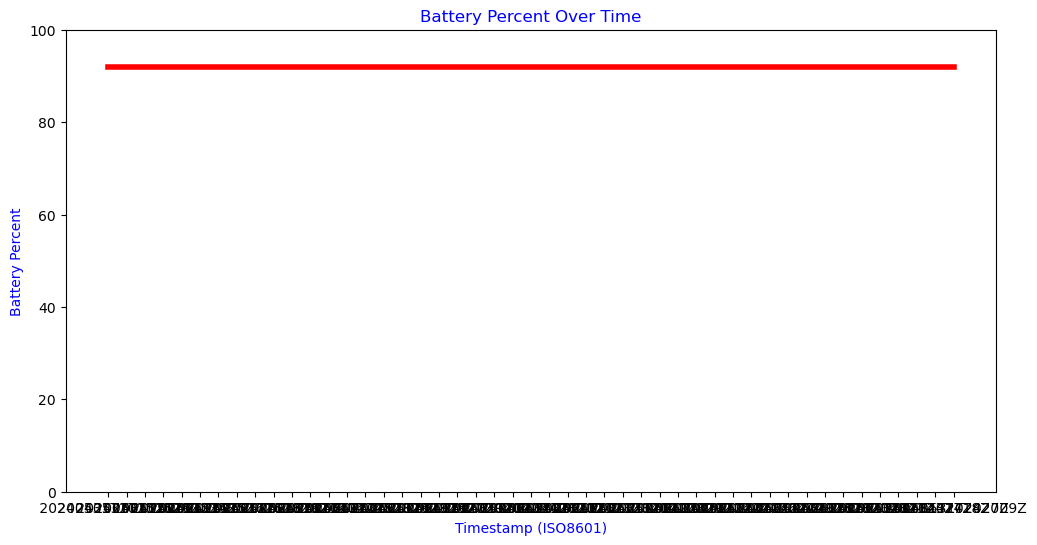

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp_iso8601'], df['battery_percent'], linewidth=4, color='red')
plt.ylim(0,100)
plt.xlabel('Timestamp (ISO8601)', color='blue')
plt.ylabel('Battery Percent', color='blue')
plt.title('Battery Percent Over Time', color='blue')
#plt.grid()

plt.show()


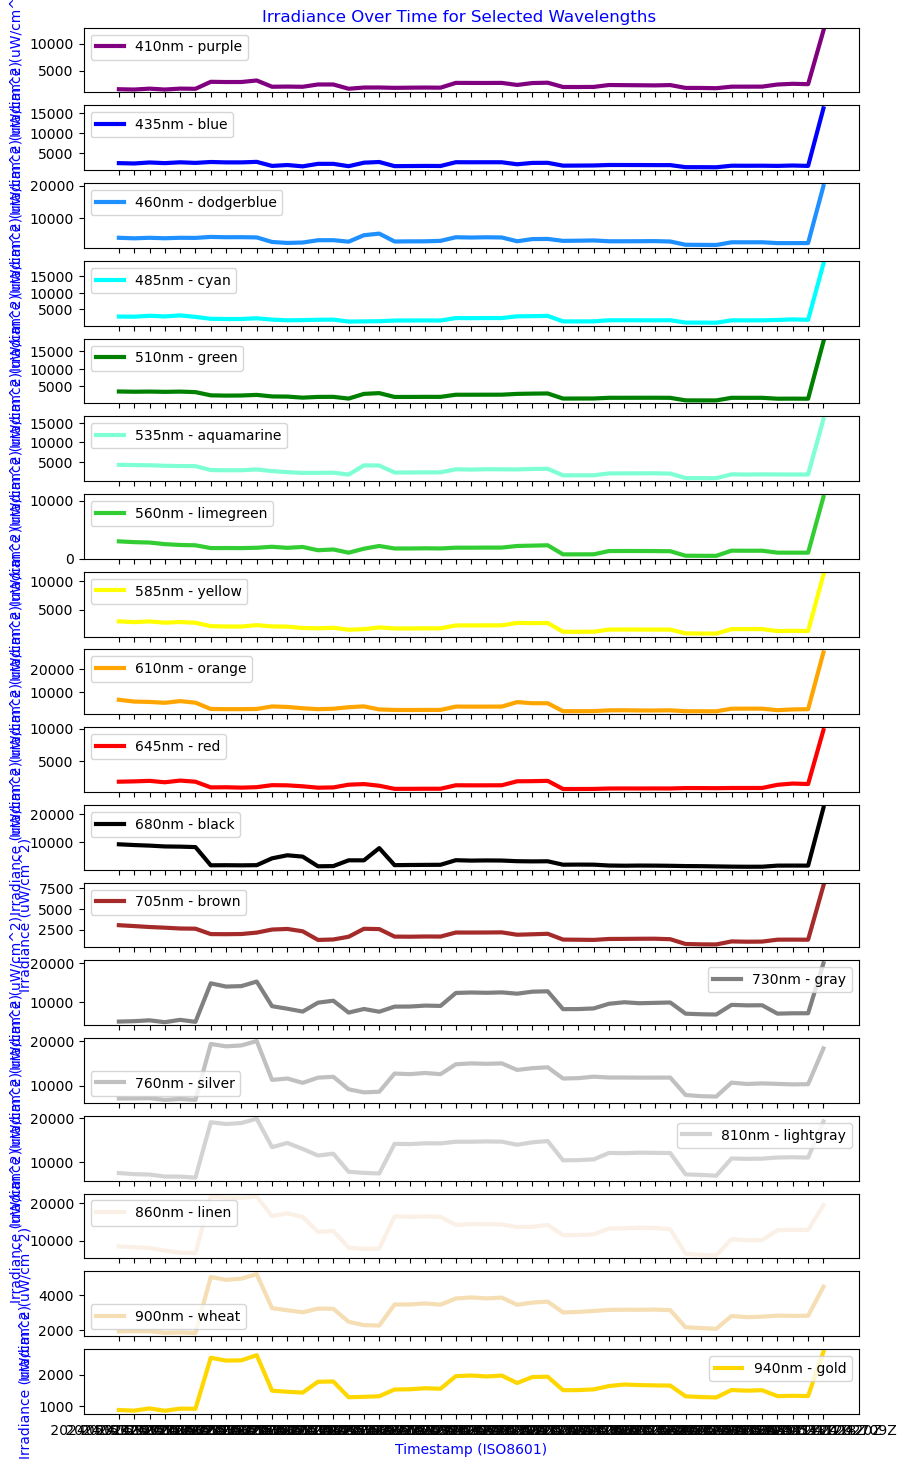

In [ ]:
# List of wavelengths for plotting
#wavelengths_to_plot = [410, 435, 450, 485, 510, 535, 560, 585, 610, 645, 680]
wavelengths_to_plot= [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940]

# Create subplots
fig, axs = plt.subplots(len(wavelengths_to_plot), 1, figsize=(10, 1 * len(wavelengths_to_plot)), sharex=True)

# Loop through each wavelength and plot the data
for i, wavelength in enumerate(wavelengths_to_plot):
    # Use regex to match column names containing the wavelength
    # irradiance_410nm_purple_irradiance_uW_per_cm_squared
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]



    # irradiance_410nm_purple_irradiance_uncertainty_uW_per_cm_squared
    wavelength_unc_pattern = f'{wavelength}nm_(.*?)_irradiance_uncertainty_uW_per_cm_squared'
    #print(wavelength_unc_pattern)

    wavelength_unc_columns = [col for col in df.columns if re.search(wavelength_unc_pattern, col)]
    #print(wavelength_unc_columns)


    # Plot the data for each matched column
    for column in wavelength_columns:
        color = re.search(wavelength_pattern, column).group(1)
        axs[i].plot(df['timestamp_iso8601'], df[column], label=f'{wavelength}nm - {color}',color=color,linewidth=3)
        #axs[i].plot(df['timestamp_iso8601'], df[column], label=f'{wavelength}nm - {color}',color=color,linewidth=3)

    axs[i].set_ylabel('Irradiance (uW/cm^2)', color='blue')
    #axs[i].set_ylim(0,1)

    axs[i].legend()

# Set common xlabel and title
plt.xlabel('Timestamp (ISO8601)', color='blue')
plt.suptitle('Irradiance Over Time for Selected Wavelengths', y=0.89, color='blue')
#plt.grid()


# Show the plot
plt.show()


## Gaussian Uncertainty Plot:

In [ ]:
from ipywidgets import interact, FloatRangeSlider, Layout


# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df.columns))))


def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = df['timestamp_iso8601'][timestamp_index]
    test = df['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aquamarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Map custom colors to standard recognized color names
            # color = map_color(color)

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in df.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in df.columns:
                wavelength_data = df[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = df[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = df[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = df[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                plt.errorbar(wavelength_data, irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                             linestyle='', marker='o', markersize=5, capsize=5, color=color)


    #  https://www.thoughtco.com/the-visible-light-spectrum-2699036
    # I modified to STELLA Colors too
    plt.axvspan(300, 380, alpha=0.6, color='black')
    plt.axvspan(380, 425, alpha=0.9, color='violet')
    plt.axvspan(425, 475, alpha=0.6, color='blue')
    plt.axvspan(475, 510, alpha=0.6, color='cyan')
    plt.axvspan(510, 560, alpha=0.6, color='green')
    plt.axvspan(560, 590, alpha=0.2, color='yellow')
    plt.axvspan(590, 625, alpha=0.3, color='orange')
    plt.axvspan(625, 690, alpha=0.6, color='red')
    plt.axvspan(690, 740, alpha=0.7, color='brown')
    plt.axvspan(740, 1000,alpha=0.7, color='black')


    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.xlim(350,1000)
    #plt.ylim(0,30000)
    #plt.ylim(0,30)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    #plt.title(f'Irradiance Over Wavelength by Timestamp {timestamp_index} and Batch {batch_index} for Backyard')
    #plt.title(f"Irradiance Over Wavelength by Timestamp Index {timestamp_index}: \n \n Test Pattern {grass['Test']} for Backyard")
    #plt.title(f"Raw Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {grass['Test']} for Backyard")
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} ")
    plt.show()


timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df) - 1, step=1, description='Timestamp Index',layout=Layout(width='90%'))
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', layout=Layout(width='90%'), max=46), O…

# Plot over a Continuous Sample Range:

In [ ]:
def update_plot(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    test = df['Test'][start_timestamp_index]
    testb = df['Test'][start_timestamp_index]
    teste = df['Test'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

            for column in wavelength_columns:
                #color = 'black'  # Default color for wavelengths not explicitly defined
                color = test_colors[df['Test'][timestamp_index]]  # Get color based on 'Test' column value


                # Check if the column exists before using it
                if column in df.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(df[column][timestamp_index])

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=3, color=color)

   #  https://www.thoughtco.com/the-visible-light-spectrum-2699036
    # I modified to STELLA Colors too
    plt.axvspan(300, 380, alpha=0.6, color='black',  label = 'Near UV from 300-380nm')
    plt.axvspan(380, 425, alpha=0.9, color='violet', label = 'Violet from 380-425m')
    plt.axvspan(425, 475, alpha=0.6, color='blue',   label = 'Blue from 425-475nm')
    plt.axvspan(475, 510, alpha=0.6, color='cyan',   label = 'Cyan from 475-510nm')
    plt.axvspan(510, 560, alpha=0.6, color='green',  label = 'Green from 510-560nm')
    plt.axvspan(560, 590, alpha=0.2, color='yellow', label = 'Yellow from 560-590nm')
    plt.axvspan(590, 625, alpha=0.3, color='orange', label = 'Orange from 590-625nm')
    plt.axvspan(625, 690, alpha=0.6, color='red',    label = 'Red from 625-690nm')
    plt.axvspan(690, 740, alpha=0.7, color='brown',  label = 'Brwon from 690-740nm')
    plt.axvspan(740, 1000,alpha=0.7, color='black',  label = 'Near IR from 740-1000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(400,950)
    #plt.ylim(0,1500)
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()

# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(df) - 1), min=0, max=len(df) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 46), description='Timestamp Range', layout=Layout(width='90%'),…

![image.png](https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/Plant_colors.png?raw=1)



---
---
---
# **Now we will apply Normalization to our data per recommendations from Paul Mirel.**

## Load White Standard data taken in same lighting conditions:

### Email from Paul Mirel of NASA, February 5, 2024:
    It’s general practice to measure a white reference in the same illumination as the sample, and then to measure the sample. The unitless reflectance from the sample is then the sample signal divided by the white reference signal, in each wavelength. Landsat uses a stretch of desert sand, or a huge white tarp!, as a reference. Spectralon is the material of choice for white references, but it’s expensive. We get quite good results with ordinary white Styrofoam (without cover sheets), and are considering using white playground sand, or a plain white felt acrylic blanket. The goal is a material that scatters light equally in all directions, and does not have much, or any, specular shiny reflectance.


## White reading (first reading) and then calibrate all readings to this white card reading:

In [ ]:
def update_plot(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    testb = white['Test'][start_timestamp_index]
    teste = white['Test'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

            for column in wavelength_columns:
                color = 'black'  # Default color for wavelengths not explicitly defined

                # Check if the column exists before using it
                if column in white.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(white[column][timestamp_index])

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=4, color='white')

   #  https://www.thoughtco.com/the-visible-light-spectrum-2699036
    # I modified to STELLA Colors too
    plt.axvspan(300, 380, alpha=0.6, color='black',  label = 'Near UV from 300-380nm')
    plt.axvspan(380, 425, alpha=0.9, color='violet', label = 'Violet from 380-425m')
    plt.axvspan(425, 475, alpha=0.6, color='blue',   label = 'Blue from 425-475nm')
    plt.axvspan(475, 510, alpha=0.6, color='cyan',   label = 'Cyan from 475-510nm')
    plt.axvspan(510, 560, alpha=0.6, color='green',  label = 'Green from 510-560nm')
    plt.axvspan(560, 590, alpha=0.2, color='yellow', label = 'Yellow from 560-590nm')
    plt.axvspan(590, 625, alpha=0.3, color='orange', label = 'Orange from 590-625nm')
    plt.axvspan(625, 690, alpha=0.6, color='red',    label = 'Red from 625-690nm')
    plt.axvspan(690, 740, alpha=0.7, color='brown',  label = 'Brwon from 690-740nm')
    plt.axvspan(740, 1000,alpha=0.7, color='black',  label = 'Near IR from 740-1000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(400,950)
    #plt.ylim(0,30000)
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")
    plt.title(f"White and Gray Card Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()

# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(white) - 1), min=0, max=len(white) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 0), description='Timestamp Range', layout=Layout(width='90%'), …

**In the above plot for our white standard, there is quite a range of magnitudes across what should be a uniform white specrtum. This is probably related to instrument detector bias. Our STS STELLA instrument always has a strong peak at 610nm.**

---
---
# **White-Card Correct all STELLA-Q2 Readings to our White-Card Calibration data**


In [ ]:
# Extract the white standard readings from the DataFrame

# Initialize white_standard_readings as an empty dictionary
white_standard_readings = {}


# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(white.columns))))

timestamp = white['timestamp_iso8601'][0]

for wavelength in wavelengths:
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

    for column in wavelength_columns:
        color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
        if wavelength == '410':
            color = 'purple'
        elif wavelength == '435':
            color = 'blue'
        elif wavelength == '460':
            color = 'dodgerblue'
        elif wavelength == '485':
            color = 'cyan'
        elif wavelength == '510':
            color = 'green'
        elif wavelength == '535':
            color = 'aquamarine'
        elif wavelength == '560':
            color = 'limegreen'
        elif wavelength == '585':
            color = 'yellow'
        elif wavelength == '610':
            color = 'orange'
        elif wavelength == '645':
            color = 'red'
        elif wavelength == '680':
            color = 'black'
        elif wavelength == '705':
            color = 'brown'
        elif wavelength == '730':
            color = 'gray'
        elif wavelength == '760':
            color = 'silver'
        elif wavelength == '810':
            color = 'lightgray'
        elif wavelength == '860':
            color = 'linen'
        elif wavelength == '900':
            color = 'wheat'
        elif wavelength == '940':
            color = 'gold'

        # Map custom colors to standard recognized color names
        # color = map_color(color)

        # Check if the column exists before using it
        if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in white.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in white.columns:
            #wavelength_data = white[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][0]
            #irradiance_data = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_reading = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_standard_readings[wavelength] = white_reading

    #print()
    #print('1) This is the raw white card readings from our white card calibration:',white_reading, 'at', wavelength,'nm.')

    #print()
    #print('2) These are our white card standard wavelengths and readings from our spectrometer:',white_standard_readings,'used with wavelength', wavelength,'nm.')


scaling_factor_save = []
# Calculate scaling factors using only white standard readings
scaling_factors = {}
for wavelength, white_reading in white_standard_readings.items():
    # Assuming the minimum possible reading is zero
    scaling_factor = 1.0 / white_reading
    scaling_factors[wavelength] = scaling_factor
    scaling_factor_save.append(scaling_factor)

print('scaling_factor_save:',scaling_factor_save)

#print()
#print('3) These are our wavelengths and white scaling factors:',scaling_factors)

# Print scaling factors

k=0
print()
print("Scaling Factors:")
for wavelength, factor in scaling_factors.items():
    print(f"4) These are our final wavelength and scaling factors per wavelength {wavelength}nm: {factor} \tline {k}")
    k=k+1


#print([scaling_factors[factor] for wavelength in wavelengths])

scaling_factor_save: [8.048007093952434e-05, 6.154283409226836e-05, 5.035876038706658e-05, 5.339632157594874e-05, 5.616038589332795e-05, 6.256416381573147e-05, 9.422729336382873e-05, 9.034336226784837e-05, 3.6408542238377315e-05, 0.00010225961205492085, 4.5132371193238345e-05, 0.00012739560191005385, 5.001700578196587e-05, 5.4651215939871726e-05, 5.1779959649289626e-05, 5.135030289676395e-05, 0.00022335782756491437, 0.0003679662006318983]

Scaling Factors:
4) These are our final wavelength and scaling factors per wavelength 410nm: 8.048007093952434e-05 	line 0
4) These are our final wavelength and scaling factors per wavelength 435nm: 6.154283409226836e-05 	line 1
4) These are our final wavelength and scaling factors per wavelength 460nm: 5.035876038706658e-05 	line 2
4) These are our final wavelength and scaling factors per wavelength 485nm: 5.339632157594874e-05 	line 3
4) These are our final wavelength and scaling factors per wavelength 510nm: 5.616038589332795e-05 	line 4
4) These 

# White Card Corrected Spectral Data Over a Range of Readings:

In [ ]:
def update_plot(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    test = df['Test'][start_timestamp_index]
    testb = df['Test'][start_timestamp_index]
    teste = df['Test'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]



            # Apply scaling factor to correct irradiance data
            scaling_factor = scaling_factors[wavelength]
            #print(scaling_factor)
            #corrected_irradiance_data = irradiance_data * scaling_factor


            for column in wavelength_columns:
                color = test_colors[df['Test'][timestamp_index]]  # Get color based on 'Test' column value

                # Check if the column exists before using it
                if column in df.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(df[column][timestamp_index]* scaling_factor)

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=3, color=color)

   #  https://www.thoughtco.com/the-visible-light-spectrum-2699036
    # I modified to STELLA Colors too
    plt.axvspan(300, 380, alpha=0.6, color='black',  label = 'Near UV from 300-380nm')
    plt.axvspan(380, 425, alpha=0.9, color='violet', label = 'Violet from 380-425m')
    plt.axvspan(425, 475, alpha=0.6, color='blue',   label = 'Blue from 425-475nm')
    plt.axvspan(475, 510, alpha=0.6, color='cyan',   label = 'Cyan from 475-510nm')
    plt.axvspan(510, 560, alpha=0.6, color='green',  label = 'Green from 510-560nm')
    plt.axvspan(560, 590, alpha=0.2, color='yellow', label = 'Yellow from 560-590nm')
    plt.axvspan(590, 625, alpha=0.3, color='orange', label = 'Orange from 590-625nm')
    plt.axvspan(625, 690, alpha=0.6, color='red',    label = 'Red from 625-690nm')
    plt.axvspan(690, 740, alpha=0.7, color='brown',  label = 'Brwon from 690-740nm')
    plt.axvspan(740, 1000,alpha=0.7, color='black',  label = 'Near IR from 740-1000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(400,950)
    plt.ylim(0,1.2)
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")
    plt.title(f"Corrected Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()

# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(df) - 1), min=0, max=len(df) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Add a Boost component to Shady or Cloudy White Card readings
#boost_slider = widgets.FloatSlider(value=1, min=0.5, max=10, step=0.01, description='Boost',orientation='horizontal',layout=Layout(width='90%'))


# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 46), description='Timestamp Range', layout=Layout(width='90%'),…

In [ ]:
def update_plot(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    test = df['Test'][start_timestamp_index]
    testb = df['Test'][start_timestamp_index]
    teste = df['Test'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]



            # Apply scaling factor to correct irradiance data
            scaling_factor = scaling_factors[wavelength]
            #print(scaling_factor)
            #corrected_irradiance_data = irradiance_data * scaling_factor


            for column in wavelength_columns:
                color = test_colors[df['Test'][timestamp_index]]  # Get color based on 'Test' column value

                # Check if the column exists before using it
                if column in df.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(df[column][timestamp_index]* scaling_factor)

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='-', linewidth=2, color=color)

   #  https://www.thoughtco.com/the-visible-light-spectrum-2699036
    # I modified to STELLA Colors too
    plt.axvspan(300, 380, alpha=0.6, color='black',  label = 'Near UV from 300-380nm')
    plt.axvspan(380, 425, alpha=0.9, color='violet', label = 'Violet from 380-425m')
    plt.axvspan(425, 475, alpha=0.6, color='blue',   label = 'Blue from 425-475nm')
    plt.axvspan(475, 510, alpha=0.6, color='cyan',   label = 'Cyan from 475-510nm')
    plt.axvspan(510, 560, alpha=0.6, color='green',  label = 'Green from 510-560nm')
    plt.axvspan(560, 590, alpha=0.2, color='yellow', label = 'Yellow from 560-590nm')
    plt.axvspan(590, 625, alpha=0.3, color='orange', label = 'Orange from 590-625nm')
    plt.axvspan(625, 690, alpha=0.6, color='red',    label = 'Red from 625-690nm')
    plt.axvspan(690, 740, alpha=0.7, color='brown',  label = 'Brwon from 690-740nm')
    plt.axvspan(740, 1000,alpha=0.7, color='black',  label = 'Near IR from 740-1000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(400,950)
    plt.ylim(0,1.2)
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")
    plt.title(f"Corrected Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()

# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(df) - 1), min=0, max=len(df) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Add a Boost component to Shady or Cloudy White Card readings
#boost_slider = widgets.FloatSlider(value=1, min=0.5, max=10, step=0.01, description='Boost',orientation='horizontal',layout=Layout(width='90%'))


# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 46), description='Timestamp Range', layout=Layout(width='90%'),…

![image.png](https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/Plant_colors.png?raw=1)

# Plot mean of each Plant type (work in progress):

In [ ]:
# this does not work yet for mean of each Plant Type

def update_plot_mean(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    testb = df['Test'][start_timestamp_index]
    teste = df['Test'][end_timestamp_index]

    # Create a dictionary to store mean irradiance data for each test pattern
    mean_irradiance_data = {}

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        test_pattern = df['Test'][timestamp_index]
        if test_pattern not in mean_irradiance_data:
            mean_irradiance_data[test_pattern] = {}

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

            # Apply scaling factor to correct irradiance data
            scaling_factor = scaling_factors[wavelength]

            for column in wavelength_columns:
                if column in df.columns:
                    # Extract and scale irradiance data
                    irradiance_data = df[column][timestamp_index] * scaling_factor

                    if wavelength not in mean_irradiance_data[test_pattern]:
                        mean_irradiance_data[test_pattern][wavelength] = []

                    mean_irradiance_data[test_pattern][wavelength].append(irradiance_data)

    # Calculate mean irradiance for each wavelength and test pattern
    for test_pattern, irradiance_data in mean_irradiance_data.items():
        wavelength_data_list = []
        mean_irradiance_list = []

        for wavelength, irradiance_values in irradiance_data.items():
            mean_irradiance = np.mean(irradiance_values)
            wavelength_data_list.append(wavelength)
            mean_irradiance_list.append(mean_irradiance)

        color = test_colors[test_pattern]
        plt.plot(wavelength_data_list, mean_irradiance_list, linestyle='-', linewidth=2, color=color, label=test_pattern)

    # Highlight spectral regions
    plt.axvspan(300, 380, alpha=0.6, color='black', label='Near UV from 300-380nm')
    plt.axvspan(380, 425, alpha=0.9, color='violet', label='Violet from 380-425nm')
    plt.axvspan(425, 475, alpha=0.6, color='blue', label='Blue from 425-475nm')
    plt.axvspan(475, 510, alpha=0.6, color='cyan', label='Cyan from 475-510nm')
    plt.axvspan(510, 560, alpha=0.6, color='green', label='Green from 510-560nm')
    plt.axvspan(560, 590, alpha=0.2, color='yellow', label='Yellow from 560-590nm')
    plt.axvspan(590, 625, alpha=0.3, color='orange', label='Orange from 590-625nm')
    plt.axvspan(625, 690, alpha=0.6, color='red', label='Red from 625-690nm')
    plt.axvspan(690, 740, alpha=0.7, color='brown', label='Brown from 690-740nm')
    plt.axvspan(740, 1000, alpha=0.7, color='black', label='Near IR from 740-1000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(400, 950)
    plt.ylim(0, 1.2)
    plt.grid()
    plt.title(f"Mean Corrected Readings Irradiance Over Wavelength by Pattern Type: {testb} - {teste}")
    plt.show()

# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(df) - 1), min=0, max=len(df) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot_mean, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 46), description='Timestamp Range', layout=Layout(width='90%'),…


---
---

# **NDVI:**
---

### Calculations of NDVI, NIRv...:


        NDVI = ( NIR  -  Red )   /  ( NIR  +  Red )

        NDVI = (860nm  -  645nm)  / (860nm  + 6 45nm)
        
        
    Testing use of NIRv in certain situations related to phenology of plant cylcles:
        
        NIRv = NDVI * NIR = NDVI * 860nm
        
        
**NDVI and now NIRv can be very good attributes to be used to differentiate Vegetative species.**

In [ ]:
# Calculate NDVI and NIRv                                                          Scaling Factors
red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]    # Red channel at 645nm
nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]     # NIR channel at 860nm
ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
nirv_values =   ndvi_values * nir_channel
test_number =   df['Test']
df['NDVI']  =   ndvi_values
df['NIRv']  =   nirv_values

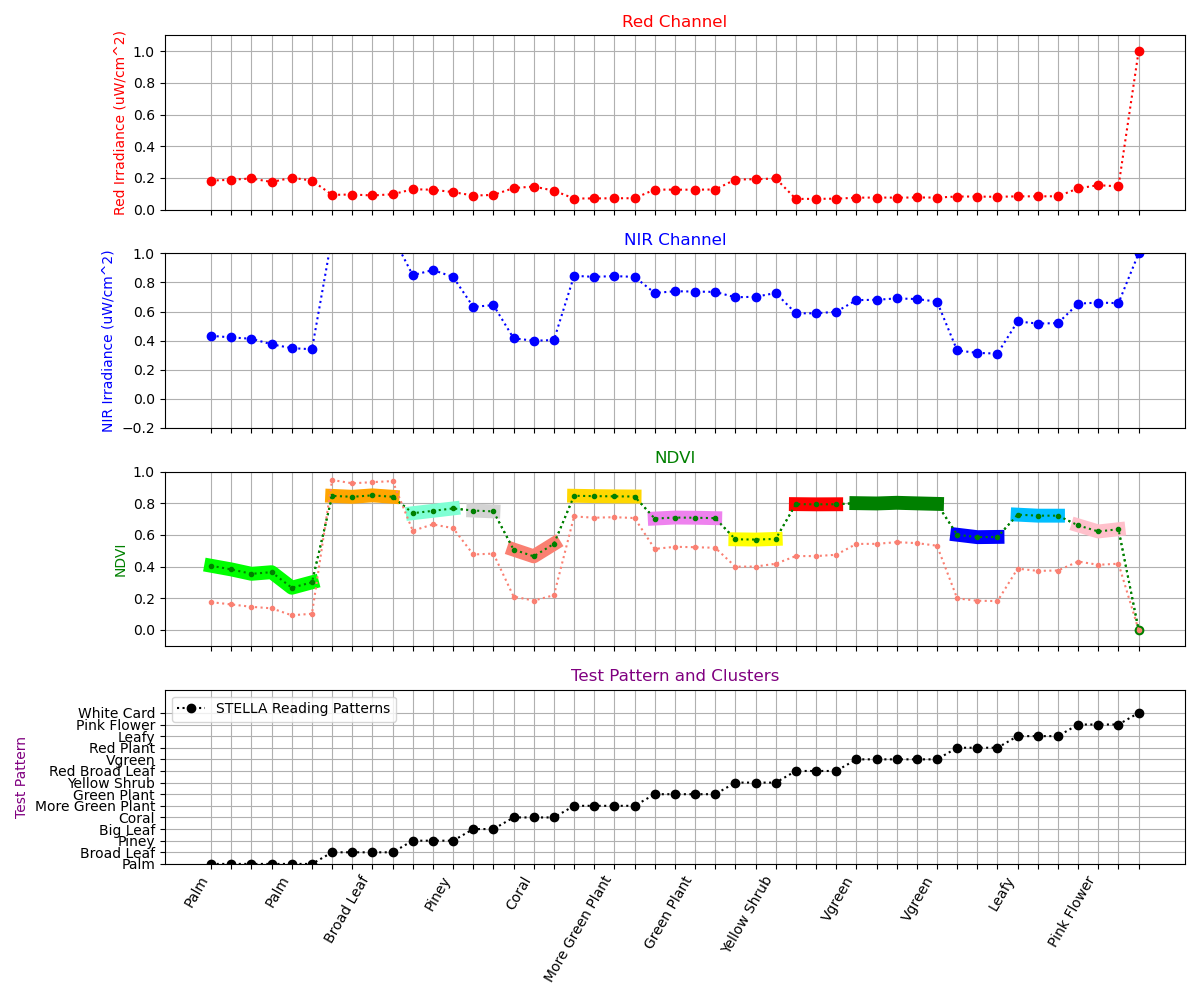

In [ ]:
# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot Red channel
#axs[0].plot(df['timestamp_iso8601'], red_channel, color='red', linewidth=2)
axs[0].plot(df['timestamp_iso8601'], red_channel, marker='o', linestyle='dotted', color='red',label = 'Red')
axs[0].set_ylabel('Red Irradiance (uW/cm^2)', color='red')
axs[0].set_title('Red Channel', color='red')
axs[0].grid()
axs[0].set_ylim(0,1.1)



# Plot NIR channel
#axs[1].plot(df['timestamp_iso8601'], nir_channel, color='blue', linewidth=2)
axs[1].plot(df['timestamp_iso8601'], nir_channel, marker='o', linestyle='dotted', color='blue',label = 'NIR')
axs[1].set_ylabel('NIR Irradiance (uW/cm^2)', color='blue')
axs[1].set_title('NIR Channel', color='blue')
axs[1].grid()
axs[1].set_ylim(-0.2,1.)



# Plot NDVI
#axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
axs[2].plot(df['timestamp_iso8601'], ndvi_values, marker='o', linestyle='dotted', color='green',label = 'NDVI')
#axs[2].plot(df['NIRv'], marker='d', markersize =4,linestyle='dotted', color='purple', label = "NIRv")

# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]

    # Plot NDVI values for the current test pattern
    axs[2].plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=10)


# Set x-axis ticks to be the index of each row in the DataFrame
x_labels = df['Test']
axs[2].plot(df['NDVI'], marker='o', markersize =3,linestyle='dotted', color='green' , label = "NDVI")
axs[2].plot(df['NIRv'], marker='o', markersize =3,linestyle='dotted', color='salmon' , label = "NIRv")
#axs[2].legend(bbox_to_anchor=(1.02, 1), loc='upper left')
axs[2].set_ylabel('NDVI', color='green')
axs[2].set_title('NDVI', color='green')
axs[2].set_ylim(-0.1,1.)
axs[2].grid()



axs[3].plot(df['timestamp_iso8601'], test_number, marker='o', linestyle='dotted', color='black',label="STELLA Reading Patterns")
axs[3].set_ylabel('Test Pattern', color='purple')
axs[3].set_title('Test Pattern and Clusters', color='purple')
axs[3].grid()
axs[3].set_ylim(0,15)
plt.legend()


# Plot every other x-label
plt.xticks(ticks=range(len(df)), labels=['' if i % 4 != 0 else label for i, label in enumerate(x_labels)], rotation=60, ha='right')


'''
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]

    # Plot NDVI values for the current test pattern
    plt.plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=10)


    # Set common xlabel
    #plt.xlabel('Timestamp (ISO8601)', color=color)
'''

# Set common xlabel
#plt.xlabel('Timestamp (ISO8601)', color='green')

# Show the plot
plt.tight_layout()
plt.show()


![image.png](https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/Plant_colors.png?raw=1)






---
---

# **Medium Article on the use of the Decision Tree:**
---


Supervised and unsupervised learnings are two major categories of machine learning. The main distinction between them is the presence of labels. Supervised learnings deal with labeled data while unsupervised learnings deal with data that are not labeled.

Under supervised learnings are regression and classification. In short, regression is used to predict continuous variables and classification is used to predict or classify discrete/categorical variables. In this article, we will look at Decision Tree Classifier, one of the methods for classification in ML.


**Decision Tree**

Decision tree is actually very intuitive and easy to understand. It is basically a set of Yes/No or if/else questions. Below is a typical diagram of decision tree.

Root node is either the topmost or the bottom node in a tree. bare nodes where the flow branches into several optional flows, and most importantly, leaf nodes are the end nodes with the final output.

That’s it! The concept of decision tree is very straightforward with nothing confusing. Along with this, another advantage of decision tree is that influences of feature scaling or regularization are not as huge as other models. However, at the same time, there is one major drawback of decision tree which is that it is subject to overfitting. For this reason, setting tree parameters before running the model is very important.

Now let’s go through decision tree classifier with Scikit-Learn.

**DecisionTreeClassifier()**

Scikit-Learn provides both DecisionTreeClassifier() and DecisionTreeRegressor(), but our major interest here is, of course, DecisionTreeClassifier(). The classifier can be important as following.


In this article, we went through decision tree classifier with Scikit-Learn and Python. Decision tree classifier is one of the simplest classification algorithms you can use in ML. It could perform classification very well, but at the same time, it is quite limited too. In upcoming articles, we will deal with other types of ML algorithms that are probably more sophisticated and complex. Thanks!


---

# RGB + NIR

In [ ]:
# Calculate NDVI and NIRv                                                          Scaling Factors

red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']     * scaling_factor_save[9]      # Red channel at 645nm
green_channel =   df['irradiance_510nm_green_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]      # Green channel at 510nm
blue_channel =   df['irradiance_435nm_blue_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]      # Blue channel at 435nm
nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared']   * scaling_factor_save[15]     # NIR channel at 860nm
ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
nirv_values =   ndvi_values * nir_channel
test_number =   df['Test']
df['NDVI']  =   ndvi_values
df['NIRv']  =   nirv_values

ndvi_names ['Palm', 'Broad Leaf', 'Piney', 'Big Leaf', 'Coral', 'More Green Plant', 'Green Plant', 'Yellow Shrub', 'Red Broad Leaf', 'Vgreen', 'Red Plant', 'Leafy', 'Pink Flower', 'White Card']
n_clusters: 14
(37, 4) (10, 4) (37,) (10,)

X:         Blue     Green       Red       NIR
0   0.247836   0.35698  0.183212  0.432883
1    0.23908  0.349493  0.188512  0.421782
2    0.26466   0.35446  0.196535  0.412431
3   0.248033  0.346484  0.174281  0.374422
4   0.269382  0.353551  0.201341  0.347694
5   0.254034  0.338648  0.182948  0.340334
6   0.277253  0.243911  0.092988  1.118256
7   0.267021  0.236424  0.095334  1.101361
8   0.267219  0.239573  0.089279  1.098106
9   0.280598  0.257204  0.096772  1.117953
10  0.175915  0.212145  0.128601  0.850079
11  0.199134  0.207527  0.125421  0.885978
12  0.164601  0.176531  0.110473  0.838016
13  0.229634   0.19815  0.088749   0.63204
14  0.229142   0.20018  0.092685  0.644225
15  0.168733  0.149173  0.135829  0.415749
16  0.259446  0.286871  0.14

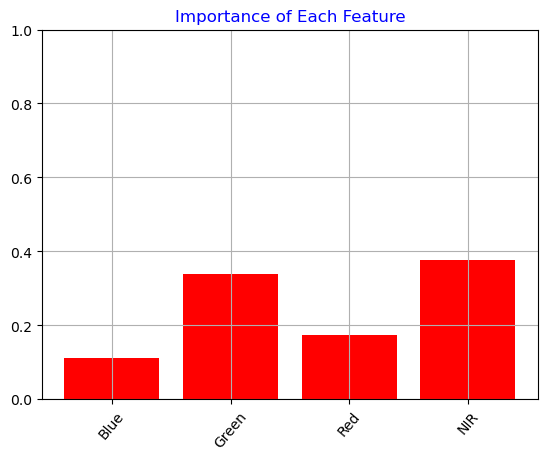

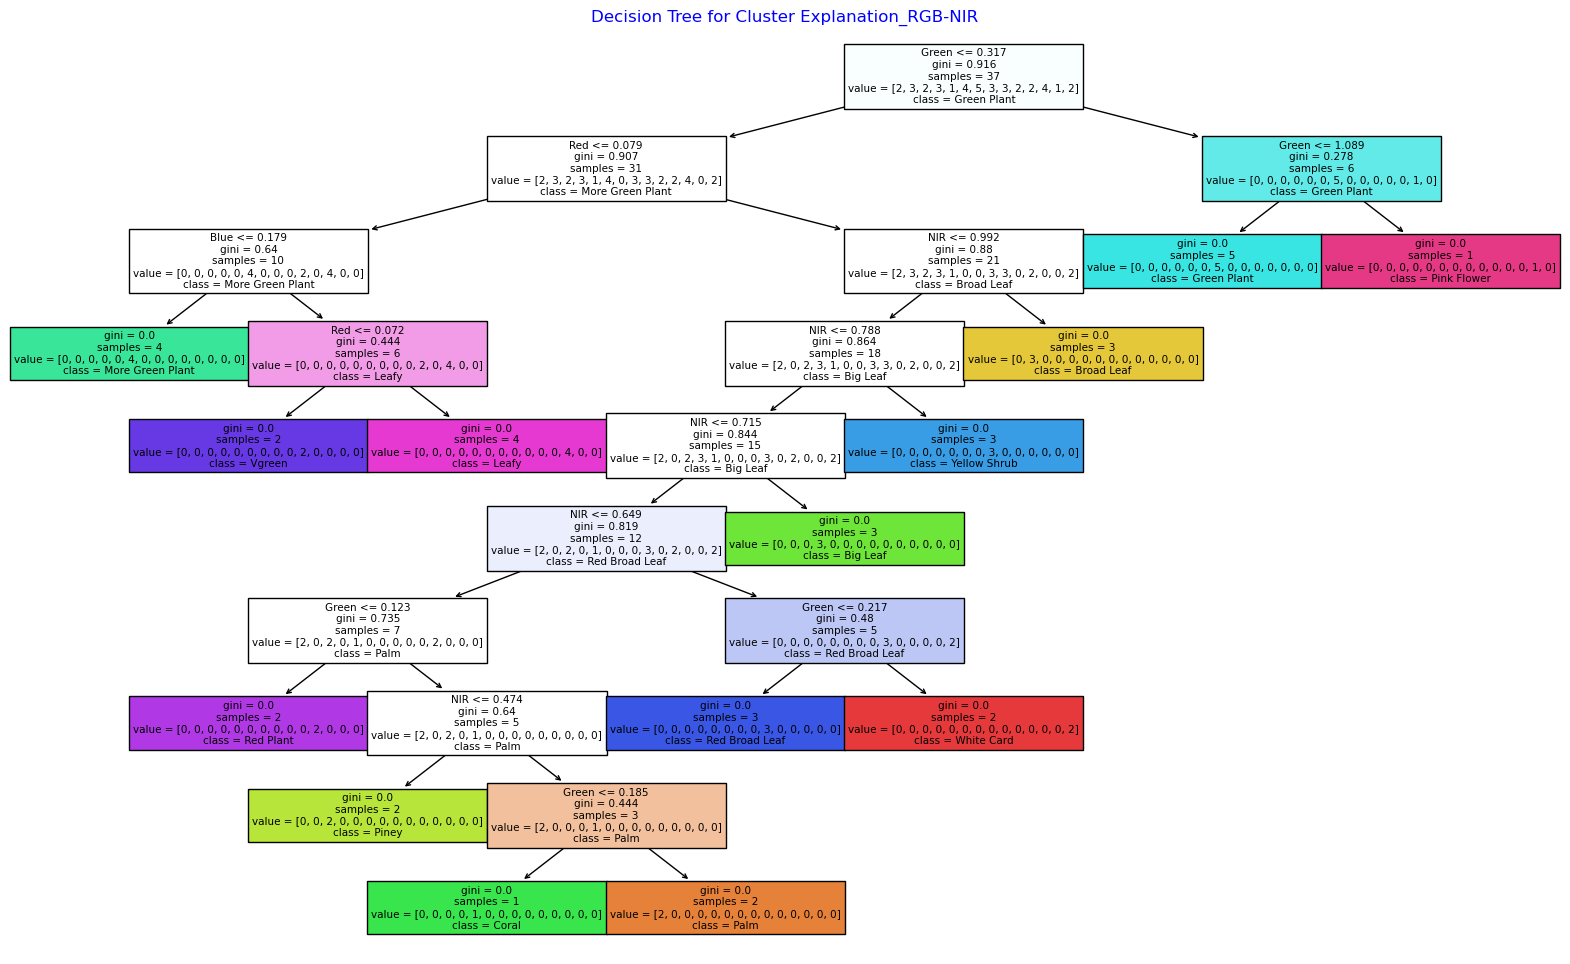

['Palm' 'Palm' 'Palm' 'Palm' 'Palm' 'Palm' 'Broad Leaf' 'Broad Leaf'
 'Broad Leaf' 'Broad Leaf' 'Piney' 'Piney' 'Piney' 'Big Leaf' 'Big Leaf'
 'Coral' 'Coral' 'Coral' 'More Green Plant' 'More Green Plant'
 'More Green Plant' 'More Green Plant' 'Green Plant' 'Green Plant'
 'Green Plant' 'Green Plant' 'Yellow Shrub' 'Yellow Shrub' 'Green Plant'
 'Red Broad Leaf' 'Red Broad Leaf' 'Red Broad Leaf' 'Vgreen' 'Vgreen'
 'Vgreen' 'Vgreen' 'Vgreen' 'Red Plant' 'Red Plant' 'Red Plant' 'Leafy'
 'Leafy' 'Leafy' 'Pink Flower' 'Pink Flower' 'Pink Flower' 'White Card']


In [ ]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.tree import plot_tree
from sklearn.tree import _tree

from sklearn.metrics import accuracy_score



# Stack the arrays horizontally to form data_selected
X = np.stack((blue_channel, green_channel, red_channel,  nir_channel,test_number), axis=1)


ndvi_df = pd.DataFrame(X, columns = [ 'Blue', 'Green', 'Red', 'NIR','Test'])
#ndvi_df['Test'] = ndvi_df.target
#ndvi_df.head()




#ndvi_names = ['White_Knee','0Grass', '1White' , '1Hedge','2White' , '2Pine','3White', '3Bush', '4White', '4Palm', '5White', '5Lawn', '7White','7Lawn','7Asphalt','7Gutter']

ndvi_names, cluster_colors = zip(*test_colors.items())
ndvi_names = np.array(ndvi_names)
ndvi_names = list(ndvi_names)
cluster_colors = list(cluster_colors)

print('ndvi_names',ndvi_names)

n_clusters = len(test_number.unique())
print('n_clusters:',n_clusters)



# Assign cluster in Supervised approach
cluster_assignments = test_number


X = ndvi_df.drop(['Test'], axis = 1)
y = ndvi_df['Test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print()




# Create a decision tree classifier with a maximum depth of 3 (adjust as needed)
#tree_classifier = DecisionTreeClassifier(max_depth=7, random_state=0)
tree_classifier = DecisionTreeClassifier(random_state=0)
tree_classifier.fit(X_train, y_train)




predicted = tree_classifier.predict(X_test)
print('X:',X)
print('X_test:',X_test)



print()
accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')

print()
print('tree_classifier.feature_importances_:',tree_classifier.feature_importances_)

print()
print('ndvi_df.columns:',ndvi_df.columns[:3])


plt.bar(ndvi_df.columns[:4], tree_classifier.feature_importances_,color='red')
plt.xticks(rotation = 50)
plt.ylim(0,1)
plt.title('Importance of Each Feature', color='blue')
plt.grid()

plt.show()



# Visualize the decision tree
plt.figure(figsize=(20, 12))
#plot_tree(tree_classifier, filled=True, feature_names=['Red', 'NIR', 'NDVI'], class_names=[f'Cluster {i + 1}' for i in range(n_clusters)])
plot_tree(tree_classifier, filled=True, feature_names=['Blue', 'Green', 'Red', 'NIR'], class_names=ndvi_names)
#plot_tree(tree_classifier, filled=True, feature_names=['Red', 'NIR', 'NDVI'], class_names=df['Test'])
plt.title('Decision Tree for Cluster Explanation_RGB-NIR', color='blue')

plt.savefig('Decision_tree_supervised_RGB-NIR.pdf')

plt.show()


predicted = tree_classifier.predict(X)
print(predicted)

# NDVI

ndvi_names ['Palm', 'Broad Leaf', 'Piney', 'Big Leaf', 'Coral', 'More Green Plant', 'Green Plant', 'Yellow Shrub', 'Red Broad Leaf', 'Vgreen', 'Red Plant', 'Leafy', 'Pink Flower', 'White Card']
n_clusters: 14
(37, 3) (10, 3) (37,) (10,)

X:          Red       NIR      NDVI
0   0.183212  0.432883  0.405247
1   0.188512  0.421782  0.382227
2   0.196535  0.412431  0.354529
3   0.174281  0.374422  0.364752
4   0.201341  0.347694  0.266565
5   0.182948  0.340334  0.300768
6   0.092988  1.118256  0.846459
7   0.095334  1.101361  0.840671
8   0.089279  1.098106  0.849621
9   0.096772  1.117953  0.840668
10  0.128601  0.850079  0.737195
11  0.125421  0.885978  0.751984
12  0.110473  0.838016  0.767055
13  0.088749   0.63204  0.753745
14  0.092685  0.644225   0.74845
15  0.135829  0.415749  0.507488
16  0.145746  0.398856  0.464763
17  0.119329  0.403562   0.54358
18  0.070053  0.845858  0.847031
19  0.070545  0.838859  0.844854
20  0.071681  0.844045  0.843445
21  0.071718  0.838617  0.842436


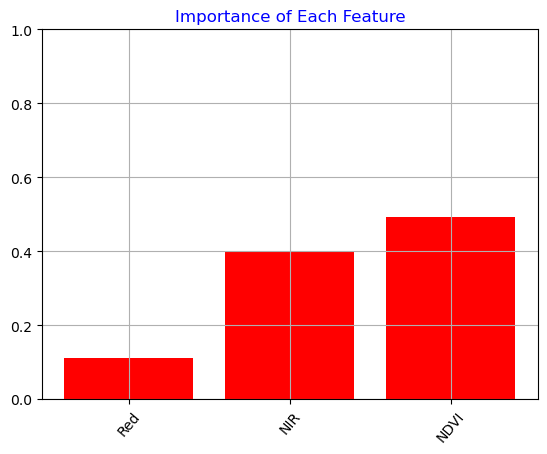

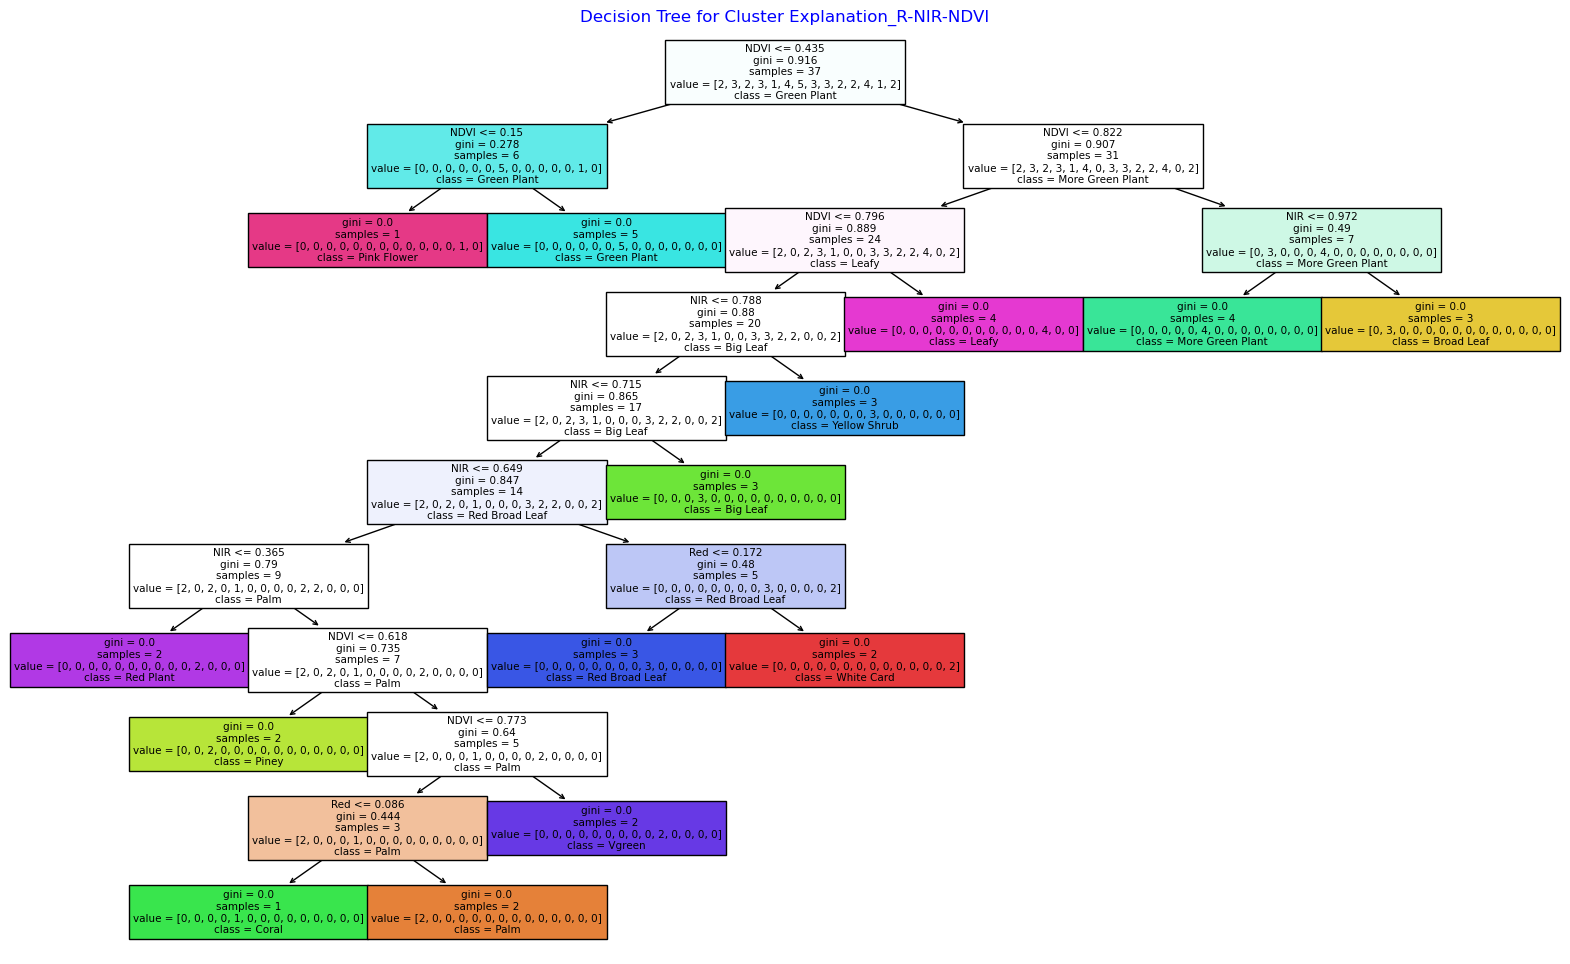

['Palm' 'Palm' 'Palm' 'Palm' 'Palm' 'Palm' 'Broad Leaf' 'Broad Leaf'
 'Broad Leaf' 'Broad Leaf' 'Piney' 'Piney' 'Piney' 'Big Leaf' 'Big Leaf'
 'Coral' 'Coral' 'Coral' 'More Green Plant' 'More Green Plant'
 'More Green Plant' 'More Green Plant' 'Green Plant' 'Green Plant'
 'Green Plant' 'Green Plant' 'Yellow Shrub' 'Yellow Shrub' 'Green Plant'
 'Red Broad Leaf' 'Red Broad Leaf' 'Red Broad Leaf' 'Vgreen' 'Vgreen'
 'Vgreen' 'Vgreen' 'Pink Flower' 'Red Plant' 'Red Plant' 'Red Plant'
 'Leafy' 'Leafy' 'Leafy' 'Pink Flower' 'Pink Flower' 'Pink Flower'
 'White Card']


In [ ]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.tree import plot_tree
from sklearn.tree import _tree

from sklearn.metrics import accuracy_score



# Stack the arrays horizontally to form data_selected
X = np.stack((red_channel, nir_channel, ndvi_values,test_number), axis=1)


ndvi_df = pd.DataFrame(X, columns = ['Red', 'NIR', 'NDVI','Test'])
#ndvi_df['Test'] = ndvi_df.target
#ndvi_df.head()




#ndvi_names = ['White_Knee','0Grass', '1White' , '1Hedge','2White' , '2Pine','3White', '3Bush', '4White', '4Palm', '5White', '5Lawn', '7White','7Lawn','7Asphalt','7Gutter']

ndvi_names, cluster_colors = zip(*test_colors.items())
ndvi_names = np.array(ndvi_names)
ndvi_names = list(ndvi_names)
cluster_colors = list(cluster_colors)

print('ndvi_names',ndvi_names)

n_clusters = len(test_number.unique())
print('n_clusters:',n_clusters)



# Assign cluster in Supervised approach
cluster_assignments = test_number


X = ndvi_df.drop(['Test'], axis = 1)
y = ndvi_df['Test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print()




# Create a decision tree classifier with a maximum depth of 3 (adjust as needed)
#tree_classifier = DecisionTreeClassifier(max_depth=7, random_state=0)
tree_classifier = DecisionTreeClassifier(random_state=0)
tree_classifier.fit(X_train, y_train)




predicted = tree_classifier.predict(X_test)
print('X:',X)
print('X_test:',X_test)



print()
accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')

print()
print('tree_classifier.feature_importances_:',tree_classifier.feature_importances_)

print()
print('ndvi_df.columns:',ndvi_df.columns[:3])


















plt.bar(ndvi_df.columns[:3], tree_classifier.feature_importances_,color='red')
plt.xticks(rotation = 50)
plt.ylim(0,1)
plt.title('Importance of Each Feature', color='blue')
plt.grid()

plt.show()



# Visualize the decision tree
plt.figure(figsize=(20, 12))
#plot_tree(tree_classifier, filled=True, feature_names=['Red', 'NIR', 'NDVI'], class_names=[f'Cluster {i + 1}' for i in range(n_clusters)])
plot_tree(tree_classifier, filled=True, feature_names=['Red', 'NIR', 'NDVI'], class_names=ndvi_names)
#plot_tree(tree_classifier, filled=True, feature_names=['Red', 'NIR', 'NDVI'], class_names=df['Test'])
plt.title('Decision Tree for Cluster Explanation_R-NIR-NDVI', color='blue')

plt.savefig('Decision_tree_supervised_R-NIR-NDVI.pdf')

plt.show()


predicted = tree_classifier.predict(X)
print(predicted)

---
## **The following is an attempt to create our own code logic from the Decision Tree Results:**

### **Our conversion code below should be used with caution, but this does give you an idea of how we might employ the Decision Tree logic to create our own code to differentiate test pattern species once this code is finalized.**
---

In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "  # format start of it statement

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += ": "
        if class_names is None:
            rule += "class response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"\n    return '{class_names[l]}' # probability of {np.round(100.0*classes[l]/np.sum(classes),2)}%"
        rule += f" , based on {path[-1][1]:,} samples"
        rules += [rule]

    return rules

In [ ]:
#text_representation = tree.export_text(tree_classifier,feature_names=['Red', 'NIR', 'NDVI'], class_names=ndvi_names)
text_representation = tree.export_text(tree_classifier,feature_names=['Red', 'NIR', 'NDVI'], class_names=ndvi_names)
print(text_representation)

print()
print()
print()



rules = get_rules(tree_classifier, feature_names=['Red', 'NIR', 'NDVI'], class_names=ndvi_names)

for r in rules:
    print(r)


|--- NDVI <= 0.44
|   |--- NDVI <= 0.15
|   |   |--- class: Pink Flower
|   |--- NDVI >  0.15
|   |   |--- class: Green Plant
|--- NDVI >  0.44
|   |--- NDVI <= 0.82
|   |   |--- NDVI <= 0.80
|   |   |   |--- NIR <= 0.79
|   |   |   |   |--- NIR <= 0.71
|   |   |   |   |   |--- NIR <= 0.65
|   |   |   |   |   |   |--- NIR <= 0.37
|   |   |   |   |   |   |   |--- class: Red Plant
|   |   |   |   |   |   |--- NIR >  0.37
|   |   |   |   |   |   |   |--- NDVI <= 0.62
|   |   |   |   |   |   |   |   |--- class: Piney
|   |   |   |   |   |   |   |--- NDVI >  0.62
|   |   |   |   |   |   |   |   |--- NDVI <= 0.77
|   |   |   |   |   |   |   |   |   |--- Red <= 0.09
|   |   |   |   |   |   |   |   |   |   |--- class: Coral
|   |   |   |   |   |   |   |   |   |--- Red >  0.09
|   |   |   |   |   |   |   |   |   |   |--- class: Palm
|   |   |   |   |   |   |   |   |--- NDVI >  0.77
|   |   |   |   |   |   |   |   |   |--- class: Vgreen
|   |   |   |   |   |--- NIR >  0.65
|   |   |   |   |   | 

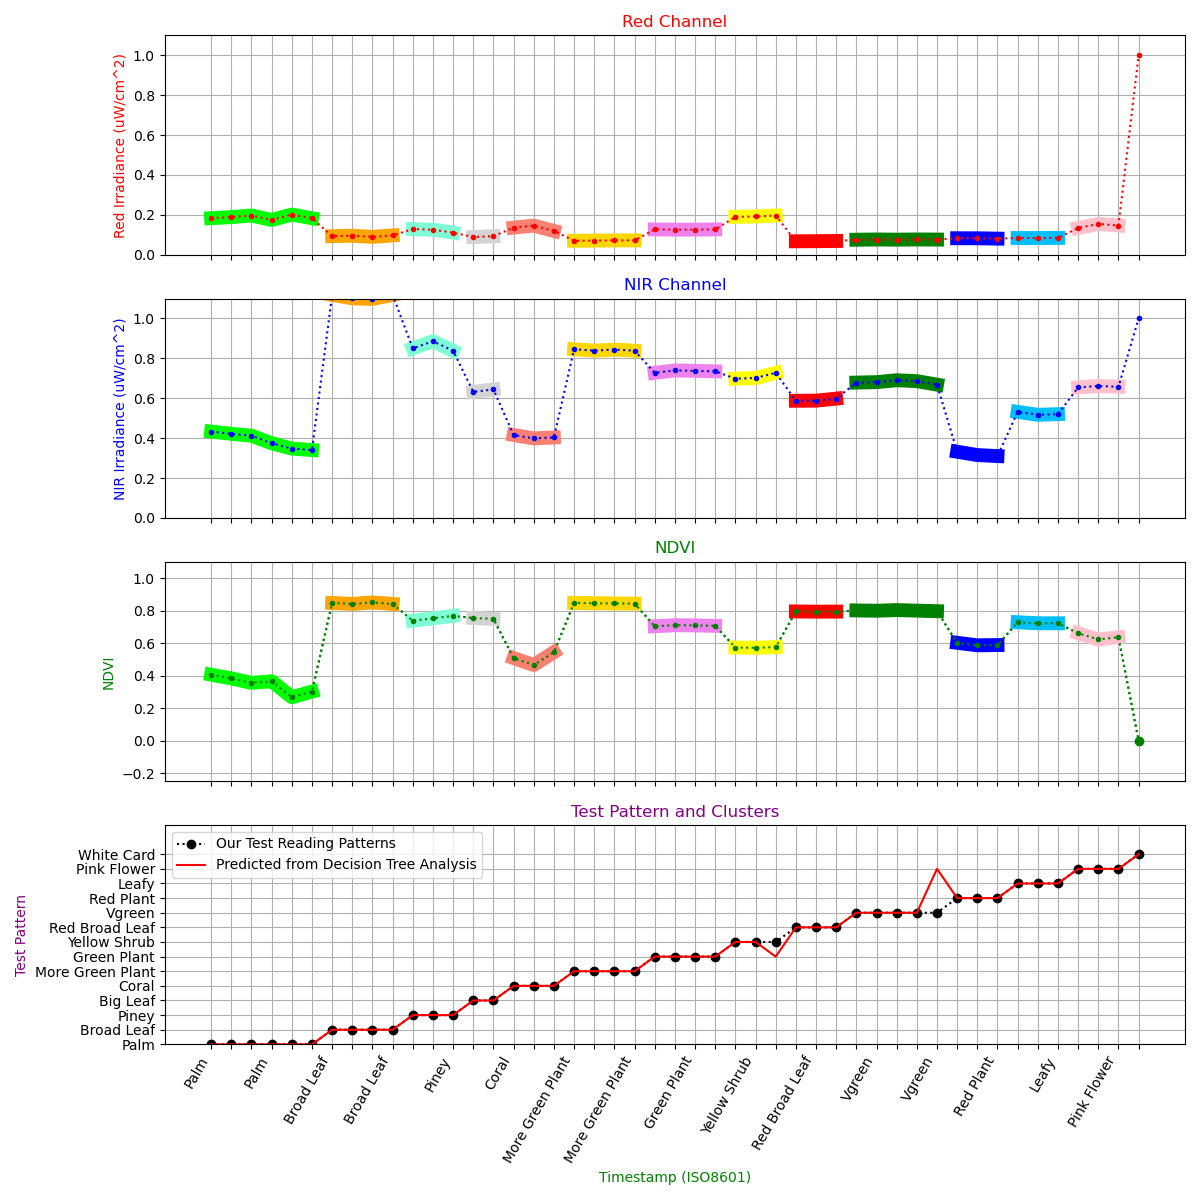

In [ ]:
# Calculate NDVI                                                           Scaling Factors
###red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]    # Red channel at 645nm
###nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]     # NIR channel at 860nm
###ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
test_number =   df['Test']

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Plot Red channel
#axs[0].plot(df['timestamp_iso8601'], red_channel, color='red', linewidth=2)
axs[0].set_ylabel('Red Irradiance (uW/cm^2)', color='red')
axs[0].set_title('Red Channel', color='red')
axs[0].grid()
axs[0].set_ylim(0,1.1)

# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]

    # Plot NDVI values for the current test pattern
    axs[0].plot(pattern_data['irradiance_645nm_red_irradiance_uW_per_cm_squared']* scaling_factor_save[9], label=test_pattern, color=color,lw=10)

axs[0].plot(df['timestamp_iso8601'], red_channel, marker='o',  markersize =3, linestyle='dotted', color='red',label = 'Red')


# Plot NIR channel
#axs[1].plot(df['timestamp_iso8601'], nir_channel, color='blue', linewidth=2)
#axs[1].plot(df['timestamp_iso8601'], nir_channel, marker='o', linestyle='dotted', color='blue',label = 'NIR')
axs[1].set_ylabel('NIR Irradiance (uW/cm^2)', color='blue')
axs[1].set_title('NIR Channel', color='blue')
axs[1].grid()
axs[1].set_ylim(0,1.1)

# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]

    # Plot NDVI values for the current test pattern
    axs[1].plot(pattern_data['irradiance_860nm_linen_irradiance_uW_per_cm_squared']* scaling_factor_save[15], label=test_pattern, color=color,lw=10)

axs[1].plot(df['timestamp_iso8601'], nir_channel, marker='o',  markersize =3, linestyle='dotted', color='blue',label = 'NIR')


# Plot NDVI
#axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
axs[2].plot(df['timestamp_iso8601'], ndvi_values, marker='o', linestyle='dotted', color='green',label = 'NDVI')
axs[2].set_ylabel('NDVI', color='green')
axs[2].set_title('NDVI', color='green')
axs[2].grid()
axs[2].set_ylim(-0.25,1.1)


# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]

    # Plot NDVI values for the current test pattern
    axs[2].plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=10)

# Set x-axis ticks to be the index of each row in the DataFrame
x_labels = df['Test']
#plt.plot(df['NDVI']) #To get the x index correct.
axs[2].plot(df['NDVI'], marker='o', markersize =3,linestyle='dotted', color='green')
#plt.plot(df['NDVI'],linestyle='dotted', color='green')

# Plot every other x-label
plt.xticks(ticks=range(len(df)), labels=['' if i % 3 != 0 else label for i, label in enumerate(x_labels)], rotation=60, ha='right')



# Plot Test
#axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
axs[3].plot(df['timestamp_iso8601'], test_number, marker='o', linestyle='dotted', color='black',label="Our Test Reading Patterns")
axs[3].plot(df['timestamp_iso8601'], predicted,  linestyle='-', color='red',label = 'Predicted from Decision Tree Analysis')
#axs[3].plot(df['timestamp_iso8601'], pred,  linestyle='-', color='blue',label = 'Predicted from Decision Tree Logic')
axs[3].set_ylabel('Test Pattern', color='purple')
axs[3].set_title('Test Pattern and Clusters', color='purple')
axs[3].grid()
axs[3].set_ylim(0,15)
plt.legend()


# Set common xlabel
plt.xlabel('Timestamp (ISO8601)', color='green')

# Show the plot
plt.tight_layout()
plt.show()



![image.png](https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/Plant_colors.png?raw=1)

---
---

# **Define End Members of each Species for futher Spectral Unmixing methods:**
## This was intended to be used with Spectral Unmixing, but we found Knn to be more straight forward.
---

To perform spectral unmixing using the data from your DataFrame `df`, you can follow these steps:

1. Read in the spectral data from your DataFrame, including the Red, NIR, and NDVI values, as well as the test patterns.

2. Identify unique test patterns from the `Test` column.

3. For each unique test pattern, calculate the average spectral values (endmembers) for Red, NIR, and NDVI.

4. Read in the spectral data again, and for each pixel, perform unmixing using the endmembers to estimate the abundance fractions of each test pattern.

Here's how you can implement these steps in Python:

```python
import pandas as pd
import numpy as np

# Step 1: Read in the spectral data from DataFrame
df = pd.read_csv('your_data.csv')  # Update 'your_data.csv' with the path to your data file

# Calculate spectral values
red_channel = df['irradiance_645nm_red_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]
nir_channel = df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]
ndvi_values = (nir_channel - red_channel) / (nir_channel + red_channel)
test_patterns = df['Test']

# Step 2: Identify unique test patterns
unique_test_patterns = test_patterns.unique()

# Step 3: Calculate endmembers for each unique test pattern
endmembers = {}
for test_pattern in unique_test_patterns:
    # Filter DataFrame for the current test pattern
    test_data = df[df['Test'] == test_pattern]
    
    # Calculate average spectral values (endmembers) for Red, NIR, and NDVI
    red_endmember = test_data['irradiance_645nm_red_irradiance_uW_per_cm_squared'].mean() * scaling_factor_save[9]
    nir_endmember = test_data['irradiance_860nm_linen_irradiance_uW_per_cm_squared'].mean() * scaling_factor_save[15]
    ndvi_endmember = (nir_endmember - red_endmember) / (nir_endmember + red_endmember)
    
    # Store endmembers for the current test pattern
    endmembers[test_pattern] = {'red': red_endmember, 'nir': nir_endmember, 'ndvi': ndvi_endmember}

# Step 4: Perform unmixing for each pixel
abundance_fractions = {}
for index, row in df.iterrows():
    # Extract spectral values for the current pixel
    red_pixel = row['irradiance_645nm_red_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]
    nir_pixel = row['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]
    ndvi_pixel = (nir_pixel - red_pixel) / (nir_pixel + red_pixel)
    
    # Initialize abundance fractions for the current pixel
    abundance_fractions[index] = {}
    
    # Perform unmixing using endmembers
    for test_pattern, endmember in endmembers.items():
        red_endmember = endmember['red']
        nir_endmember = endmember['nir']
        ndvi_endmember = endmember['ndvi']
        
        # Calculate abundance fractions using linear unmixing equation
        red_fraction = (red_pixel - red_endmember) / (nir_endmember - red_endmember)
        nir_fraction = (nir_pixel - nir_endmember) / (nir_endmember - red_endmember)
        ndvi_fraction = (ndvi_pixel - ndvi_endmember) / (1 - ndvi_endmember)
        
        # Store abundance fractions for the current test pattern and pixel
        abundance_fractions[index][test_pattern] = {'red': red_fraction, 'nir': nir_fraction, 'ndvi': ndvi_fraction}

# Now abundance_fractions dictionary contains the abundance fractions of each test pattern for each pixel
```

In this code:

- We first read in the spectral data from your DataFrame and calculate the Red, NIR, and NDVI values.
- We then identify unique test patterns and calculate the average spectral values (endmembers) for each test pattern.
- Next, we perform unmixing for each pixel in the dataset using the calculated endmembers, estimating the abundance fractions of each test pattern.
- The result is stored in the `abundance_fractions` dictionary, which contains the abundance fractions of each test pattern for each pixel in the dataset.

## **End Members Code below works well:**
---

In [ ]:
# Step 1: Read in the spectral data from DataFrame
#df = pd.read_csv('your_data.csv')  # Update 'your_data.csv' with the path to your data file
'''
# Calculate spectral values
red_channel = df['irradiance_645nm_red_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]
nir_channel = df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]
ndvi_values = (nir_channel - red_channel) / (nir_channel + red_channel)
df['NDVI'] = ndvi_values
'''
test_patterns = df['Test']


# Step 2: Identify unique test patterns
unique_test_patterns = test_patterns.unique()

# Step 3: Calculate endmembers for each unique test pattern
endmembers = {}
for test_pattern in unique_test_patterns:
    # Filter DataFrame for the current test pattern
    test_data = df[df['Test'] == test_pattern]

    # Calculate average spectral values (endmembers) for Red, NIR, and NDVI
    red_endmember = test_data['irradiance_645nm_red_irradiance_uW_per_cm_squared'].mean() * scaling_factor_save[9]
    nir_endmember = test_data['irradiance_860nm_linen_irradiance_uW_per_cm_squared'].mean() * scaling_factor_save[15]
    ndvi_endmember = (nir_endmember - red_endmember) / (nir_endmember + red_endmember)

    # Store endmembers for the current test pattern
    endmembers[test_pattern] = {'red': red_endmember, 'nir': nir_endmember, 'ndvi': ndvi_endmember}
    print('Test_pattern: \t',   test_pattern  ,'\t','\t', endmembers[test_pattern])


    #print(endmembers)

Test_pattern: 	 Palm 	 	 {'red': 0.18780472008677815, 'nir': 0.38825767177415454, 'ndvi': 0.34797090474840053}
Test_pattern: 	 Broad Leaf 	 	 {'red': 0.09359334001739344, 'nir': 1.1089187773586244, 'ndvi': 0.8443369698068043}
Test_pattern: 	 Piney 	 	 {'red': 0.12149839460156013, 'nir': 0.8580241928393715, 'ndvi': 0.7519232406493396}
Test_pattern: 	 Big Leaf 	 	 {'red': 0.09071705834422165, 'nir': 0.6381327816132304, 'ndvi': 0.7510679062520823}
Test_pattern: 	 Coral 	 	 {'red': 0.13363456536023813, 'nir': 0.40605577234201107, 'ndvi': 0.5047731781554882}
Test_pattern: 	 More Green Plant 	 	 {'red': 0.07099923212327676, 'nir': 0.8418445682349829, 'ndvi': 0.8444438531643377}
Test_pattern: 	 Green Plant 	 	 {'red': 0.12627349240280805, 'nir': 0.7349524939675065, 'ndvi': 0.7067587499652797}
Test_pattern: 	 Yellow Shrub 	 	 {'red': 0.19272494132080062, 'nir': 0.7091031794084663, 'ndvi': 0.5725905260861619}
Test_pattern: 	 Red Broad Leaf 	 	 {'red': 0.06804722720737831, 'nir': 0.5912542342603

## Write to a csv and xlsx files to use in other applications:

In [ ]:
# Create an empty list to store rows of the calibration DataFrame
calibration_rows = []


k=1
# Iterate over the endmembers dictionary to populate the calibration DataFrame
for test_pattern, endmember_data in endmembers.items():
    # Extract endmember data
    red_endmember = endmember_data['red']
    nir_endmember = endmember_data['nir']
    ndvi_endmember = endmember_data['ndvi']

    # Append data to the list of calibration rows
    calibration_rows.append({
                             'Red_Endmember': red_endmember,
                             'NIR_Endmember': nir_endmember,
                             'NDVI_Endmember': ndvi_endmember,
                             'Plant_Type': test_pattern,
                             'Test_Number':k
                            })
    k=k+1

# Create the calibration DataFrame from the list of rows
calibration_df = pd.DataFrame(calibration_rows)

# Save the calibration DataFrame to a CSV file
calibration_df.to_csv('Test_endmember_calibration_data.csv', index=False)


# Save the calibration DataFrame to a CSV file
calibration_df.to_excel('Endmember_calibration_data.xlsx', index=False)

calibration_df


Red_Endmember  NIR_Endmember  NDVI_Endmember        Plant_Type  \
0        0.187805       0.388258        0.347971              Palm   
1        0.093593       1.108919        0.844337        Broad Leaf   
2        0.121498       0.858024        0.751923             Piney   
3        0.090717       0.638133        0.751068          Big Leaf   
4        0.133635       0.406056        0.504773             Coral   
5        0.070999       0.841845        0.844444  More Green Plant   
6        0.126273       0.734952        0.706759       Green Plant   
7        0.192725       0.709103        0.572591      Yellow Shrub   
8        0.068047       0.591254        0.793578    Red Broad Leaf   
9        0.075904       0.680824        0.799389            Vgreen   
10       0.081874       0.319157        0.591684         Red Plant   
11       0.083867       0.523100        0.723653             Leafy   
12       0.144875       0.657943        0.639084       Pink Flower   
13       1.000000       1.000000        0.000000        White Card   

    Test_Number  
0             1  
1             2  
2             3  
3             4  
4             5  
5             6  
6             7  
7             8  
8             9  
9            10  
10           11  
11           12  
12           13  
13           14

# **3D Cross Plot of our data looking for natural clusters in Red, NIR and NDVI space:**
---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


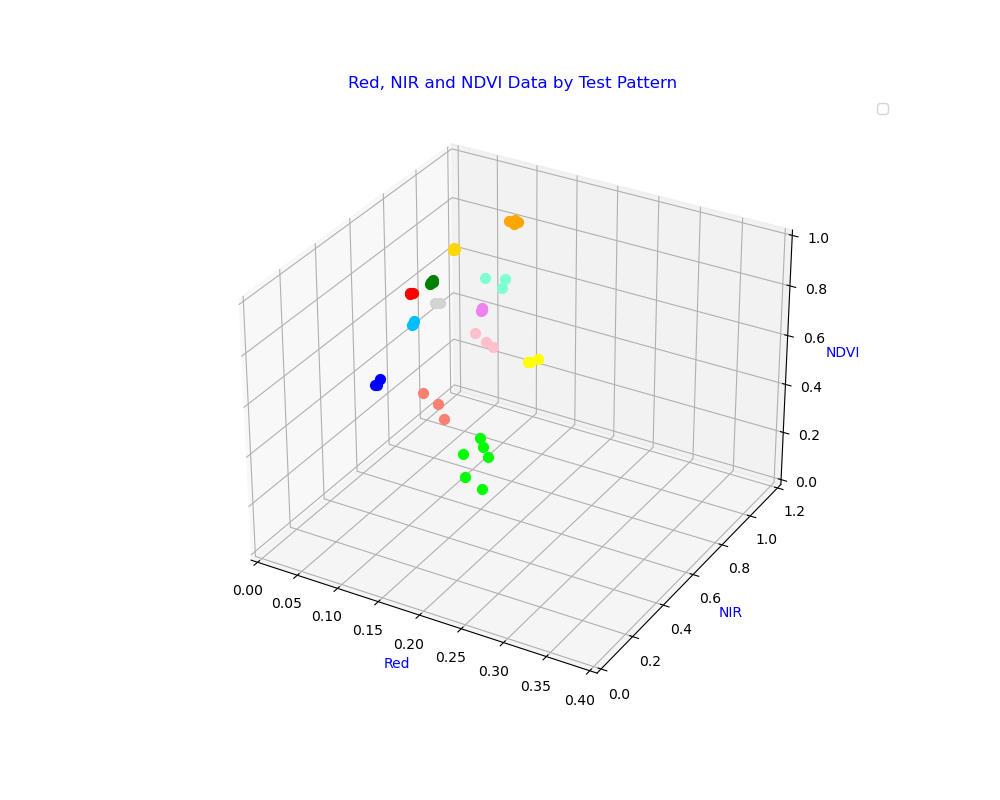

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget


'''
# Calculate spectral values
red_channel = df['irradiance_645nm_red_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]
nir_channel = df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]
ndvi_values = (nir_channel - red_channel) / (nir_channel + red_channel)
test_patterns = df['Test']
'''


endmember_data = calibration_df
red = df['irradiance_645nm_red_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]
nir = df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]
ndvi = (nir_channel - red_channel) / (nir_channel + red_channel)
test = df['Test']



# Step 6: Create a 3D scatter plot for the original data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')



'''
# Plot the cluster centers (endmembers) and create a legend for them
for test_pattern, color in test_colors.items():
    ax.scatter(endmember_data['Red_Endmember'], endmember_data['NIR_Endmember'], endmember_data['NDVI_Endmember'],
               color=color, marker='o', s=50, label=test_pattern)
              #color=color, marker='^', s=50, label=test_pattern)
'''


# Plot the data points colored by rock_index_knn
for i, (red, nir, ndvi, test) in enumerate(zip(red_channel, nir_channel, ndvi_values, test)):
    ax.scatter(red, nir, ndvi, color=test_colors[test],marker='o', s=50,)




ax.set_xlabel('Red', color='blue')
ax.set_ylabel('NIR', color='blue')
ax.set_zlabel('NDVI', color='blue')

ax.set_xlim(0, 0.4)
ax.set_ylim(0, 1.2)
ax.set_zlim(0, 1)

# Create a legend outside the plot area
plt.legend(bbox_to_anchor=(1.08, 1), loc='upper left')

plt.title('Red, NIR and NDVI Data by Test Pattern', color='blue')
plt.show()



# **3D Cross Plot of our data looking for natural clusters in Red, Green, Blue space:**
---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


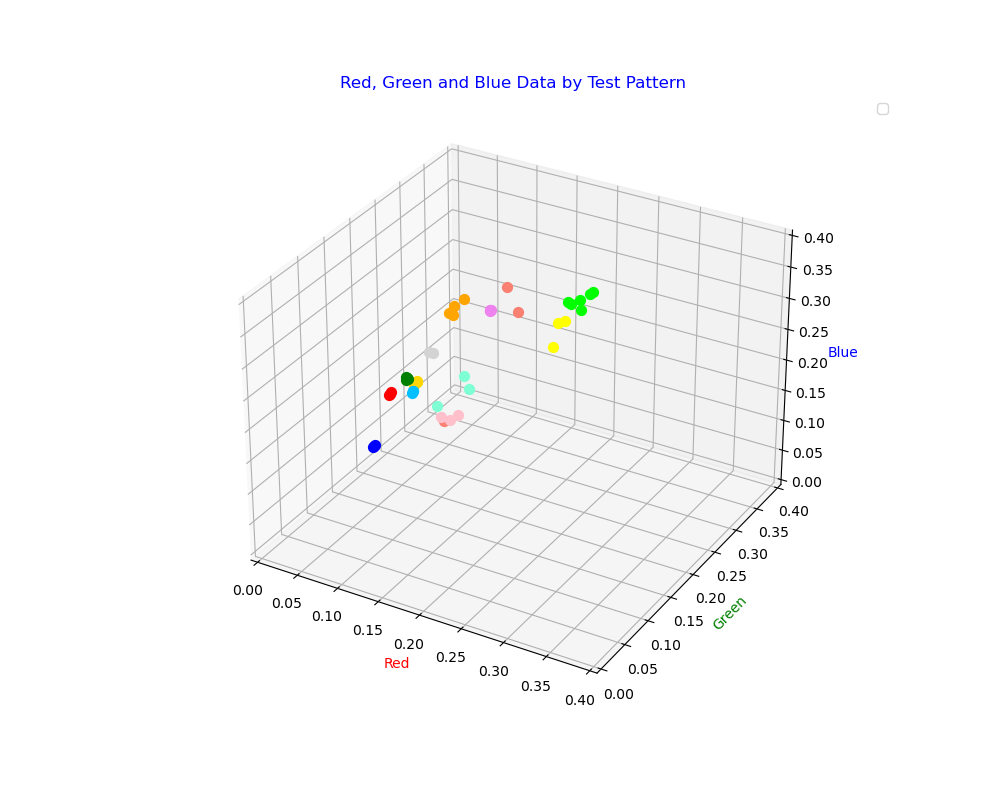

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget


'''
red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']     * scaling_factor_save[9]      # Red channel at 645nm
green_channel =   df['irradiance_510nm_green_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]      # Green channel at 510nm
blue_channel =   df['irradiance_435nm_blue_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]      # Blue channel at 435nm
nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared']   * scaling_factor_save[15]     # NIR channel at 860nm
ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
nirv_values =   ndvi_values * nir_channel
test_number =   df['Test']
df['NDVI']  =   ndvi_values
df['NIRv']  =   nirv_values
'''


endmember_data = calibration_df
red = df['irradiance_645nm_red_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]
green = df['irradiance_510nm_green_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]
blue = df['irradiance_435nm_blue_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]
nir = df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]
#ndvi = (nir_channel - red_channel) / (nir_channel + red_channel)
test = df['Test']



# Step 6: Create a 3D scatter plot for the original data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')



'''
# Plot the cluster centers (endmembers) and create a legend for them
for test_pattern, color in test_colors.items():
    ax.scatter(endmember_data['Red_Endmember'], endmember_data['NIR_Endmember'], endmember_data['NDVI_Endmember'],
               color=color, marker='o', s=50, label=test_pattern)
              #color=color, marker='^', s=50, label=test_pattern)
'''


# Plot the data points colored by rock_index_knn
for i, (red, green, blue, test) in enumerate(zip(red_channel, green_channel, blue_channel, test)):
    ax.scatter(red, green, blue, color=test_colors[test],marker='o', s=50,)




ax.set_xlabel('Red', color='red')
ax.set_ylabel('Green', color='green')
ax.set_zlabel('Blue', color='blue')

ax.set_xlim(0, 0.4)
ax.set_ylim(0, 0.4)
ax.set_zlim(0, 0.4)

# Create a legend outside the plot area
plt.legend(bbox_to_anchor=(1.08, 1), loc='upper left')

plt.title('Red, Green and Blue Data by Test Pattern', color='blue')
plt.show()



![image.png](https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/Plant_colors.png?raw=1)



---
---
# **Knn**
---

To use k-Nearest Neighbors (kNN) for classification instead of spectral angle, you need to represent your data appropriately and use a kNN algorithm to predict the test pattern based on the spectral features of each pixel.

Here's how you can modify your code to use kNN for classification:

1. **Feature Representation**: Represent each pixel's spectral signature as a feature vector containing red, NIR, and NDVI values.

2. **Labeling**: Assign labels to each spectral signature based on the known test patterns.

3. **Model Training**: Use the labeled data to train a kNN classifier.

4. **Prediction**: Predict the test pattern for each pixel using the trained kNN classifier.

Here's an example of how you can implement this:

```python
from sklearn.neighbors import KNeighborsClassifier

# Feature representation
X = df[['red', 'nir', 'ndvi']].values

# Labels
y = df['test_pattern'].values

# Model training
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed
knn.fit(X, y)

# Prediction
predicted_test_patterns = knn.predict(X)

# Add predicted test patterns to DataFrame
df['Predicted_Test'] = predicted_test_patterns
```

In this example:

- `X` contains the feature vectors (red, NIR, NDVI) of each pixel.
- `y` contains the corresponding labels (test patterns).
- We initialize a kNN classifier (`KNeighborsClassifier`) with a specified number of neighbors.
- We fit the classifier to the training data (`X`, `y`).
- We use the trained classifier to predict the test pattern for each pixel.
- Finally, we add the predicted test patterns to the DataFrame.

Make sure to adjust the number of neighbors and other parameters based on your specific dataset and requirements.


## Read in the End Member data for each Test Pattern:

In [ ]:
#read the file
file = r'Endmember_calibration_data.xlsx'
endmember_data = pd.read_excel(file,index_col=False)

endmember_data.head(19)

Red_Endmember  NIR_Endmember  NDVI_Endmember        Plant_Type  \
0        0.187805       0.388258        0.347971              Palm   
1        0.093593       1.108919        0.844337        Broad Leaf   
2        0.121498       0.858024        0.751923             Piney   
3        0.090717       0.638133        0.751068          Big Leaf   
4        0.133635       0.406056        0.504773             Coral   
5        0.070999       0.841845        0.844444  More Green Plant   
6        0.126273       0.734952        0.706759       Green Plant   
7        0.192725       0.709103        0.572591      Yellow Shrub   
8        0.068047       0.591254        0.793578    Red Broad Leaf   
9        0.075904       0.680824        0.799389            Vgreen   
10       0.081874       0.319157        0.591684         Red Plant   
11       0.083867       0.523100        0.723653             Leafy   
12       0.144875       0.657943        0.639084       Pink Flower   
13       1.000000       1.000000        0.000000        White Card   

    Test_Number  
0             1  
1             2  
2             3  
3             4  
4             5  
5             6  
6             7  
7             8  
8             9  
9            10  
10           11  
11           12  
12           13  
13           14

# **Our Knn Code below is totally transparent:**

We are finding the K nearest neighbors using the inverse square of the Euclidian Distances and then a majority vote for the K results defining the Vegetative Species label name.
---

In [ ]:
from collections import Counter


n_neighbors = 3



def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]



'''
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# # #
# # #            This is the beginnin of kNN Estimations
# # #
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
'''

'''
# Calculate NDVI from Main dataset df                                         Scaling Factors
red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]    # Red channel at 645nm
nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]     # NIR channel at 860nm
ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
test_number =   df['Test_number']
'''

test_pattern_knn = []


# Calibration End Member Data
Red_r   = endmember_data['Red_Endmember']
NIR_r  = endmember_data['NIR_Endmember']
NDVI_r    = endmember_data['NDVI_Endmember']
Test_r  = endmember_data['Test_Number']


# Load data
for k in range(0,len(df) ,1):


    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #
    # # #            Read in data
    # # #
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    Red    = red_channel[k]
    NIR    = nir_channel[k]
    NDVI   = ndvi_values[k]

    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #
    # # #            This is the beginnin of kNN Estimations
    # # #
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================


    inv_dist_array = []
    distance_knn_array = []


    dist_inv    = []
    dist_RED    = []
    dist_NIR    = []
    dist_NDVI   = []

    dist_inv_total = 0


    #this is the reference_data being used with kNN
    for i in range(0,len(calibration_df),1):


        # Compute Euclidian Distance inverse distance
        dist_RED.append(abs(Red - Red_r[i]))
        dist_NIR.append(abs(NIR - NIR_r[i]))
        dist_NDVI.append(abs(NDVI - NDVI_r[i]))
        dist_inv.append(1/(np.sqrt(dist_RED[i]**2 + dist_NIR[i]**2 + dist_NDVI[i]**2) + 0.0000001))

        # Calculalte inverse distance weights for perm
        ##Perm_weight.append(dist_inv[i]  * Test_r[i])
        inv_dist_array.append(dist_inv[i]);  # add items

        # =============================================================================
        ###                    KNN Array for all data
        # # ===========================================================================
        # # #--------------------------------------------------------------------------
        distance_knn_array = [dist_inv, Test_r]
        #
        # # #--------------------------------------------------------------------------
        # # ===========================================================================
        # =============================================================================

    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #
    # # #               Transpose and Sort Knn array
    # # #
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================

    #knn_array = np.transpose array
    knn_array = np.transpose(distance_knn_array)


    #matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
    mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)

    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #
    # # #               Calculate test_pattern_knn
    # # #
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    #------------------------------------------------------------------------------
    #print(mat_sort)




    List = []

    for d in range(0,n_neighbors):
        List.append(mat_sort[d,1])

    most_frequent(List)   == test_pattern_knn

    which_is_most_frequent(List)



df['Test_knn'] = test_pattern_knn

/var/folders/lf/9hqr0q153ls52s9btzjc56080000gp/T/ipykernel_17561/3091628861.py:145: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  most_frequent(List)   == test_pattern_knn


## Knn Predictions:

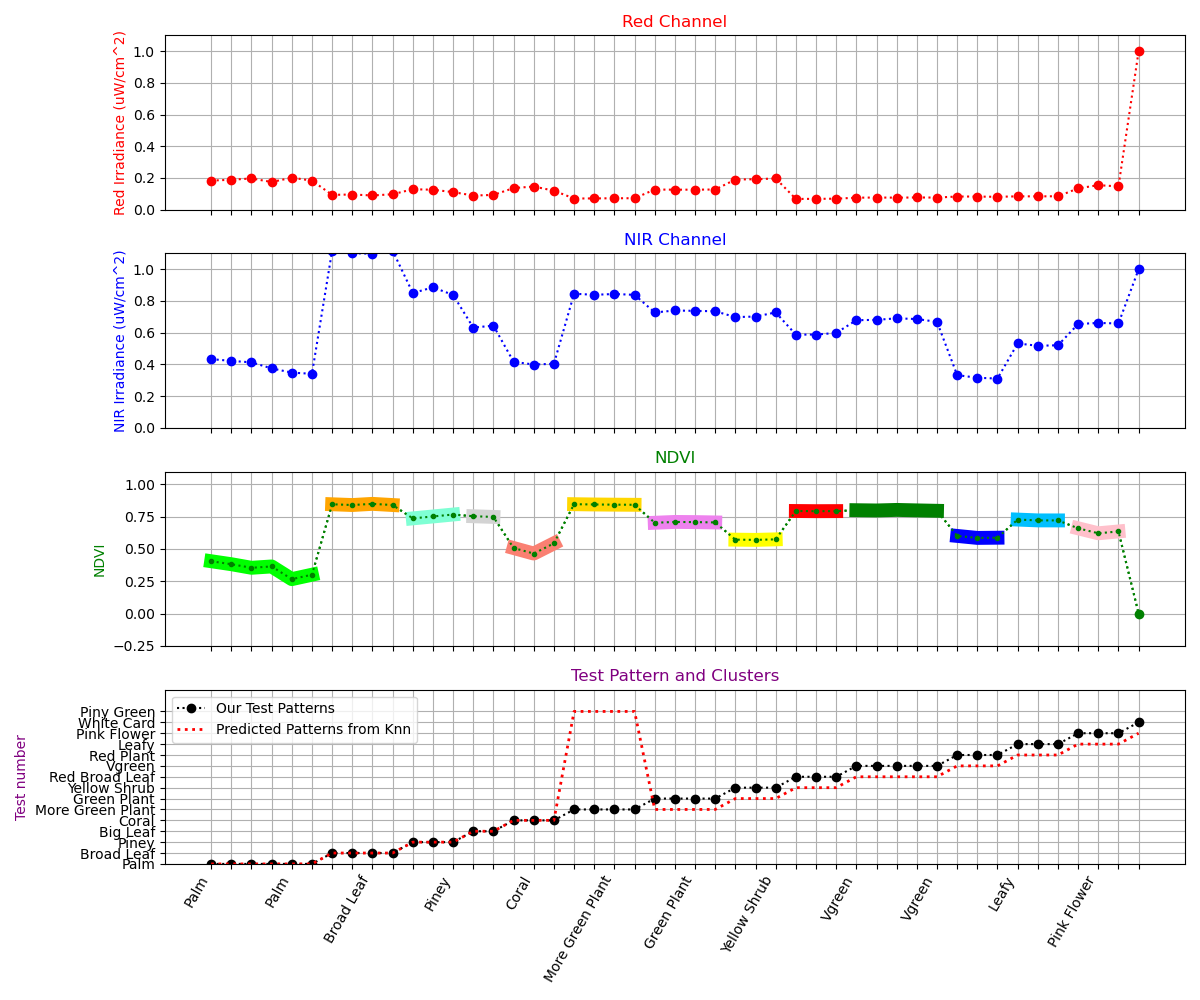

In [ ]:
# Calculate NDVI                                                           Scaling Factors
###red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]    # Red channel at 645nm
###nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]     # NIR channel at 860nm
###ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
test_number =   df['Test']

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot Red channel
#axs[0].plot(df['timestamp_iso8601'], red_channel, color='red', linewidth=2)
axs[0].plot(df['timestamp_iso8601'], red_channel, marker='o', linestyle='dotted', color='red',label = 'Red')
axs[0].set_ylabel('Red Irradiance (uW/cm^2)', color='red')
axs[0].set_title('Red Channel', color='red')
axs[0].grid()
axs[0].set_ylim(0,1.1)



# Plot NIR channel
#axs[1].plot(df['timestamp_iso8601'], nir_channel, color='blue', linewidth=2)
axs[1].plot(df['timestamp_iso8601'], nir_channel, marker='o', linestyle='dotted', color='blue',label = 'NIR')
axs[1].set_ylabel('NIR Irradiance (uW/cm^2)', color='blue')
axs[1].set_title('NIR Channel', color='blue')
axs[1].grid()
axs[1].set_ylim(0,1.1)



# Plot NDVI
#axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
axs[2].plot(df['timestamp_iso8601'], ndvi_values, marker='o', linestyle='dotted', color='green',label = 'NDVI')
axs[2].set_ylabel('NDVI', color='green')
axs[2].set_title('NDVI', color='green')
axs[2].grid()
axs[2].set_ylim(-0.25,1.1)



# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]

    # Plot NDVI values for the current test pattern
    axs[2].plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=10)

# Set x-axis ticks to be the index of each row in the DataFrame
x_labels = df['Test']
axs[2].plot(df['NDVI'], marker='o', markersize =3,linestyle='dotted', color='green')
#axs[2].legend(bbox_to_anchor=(1.02, 1), loc='upper left')




# Plot every other x-label
plt.xticks(ticks=range(len(df)), labels=['' if i % 4 != 0 else label for i, label in enumerate(x_labels)], rotation=60, ha='right')



# Plot Test
#axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
axs[3].plot(df['timestamp_iso8601'], df['Test'], marker='o', linestyle='dotted', color='black',label="Our Test Patterns")
axs[3].plot(df['timestamp_iso8601'], df['Test_knn'],  linestyle='dotted', linewidth=2, color='red',label = 'Predicted Patterns from Knn')



axs[3].set_ylabel('Test number', color='purple')
axs[3].set_title('Test Pattern and Clusters', color='purple')
axs[3].grid()
axs[3].set_ylim(0,16)
plt.legend()


# Set common xlabel
#plt.xlabel('Timestamp (ISO8601)', color='green')

# Show the plot
plt.tight_layout()
plt.show()

#print(predicted)

![image.png](https://github.com/Philliec459/STS-STELLA-Spectrometer-Readings-on-Various-Plant-Species-with-NDVI/blob/main/Plant_colors.png?raw=1)




**We can accurately predict all but part of the Shady White-Card and Mud Bank. They are both non-vegetative species.**

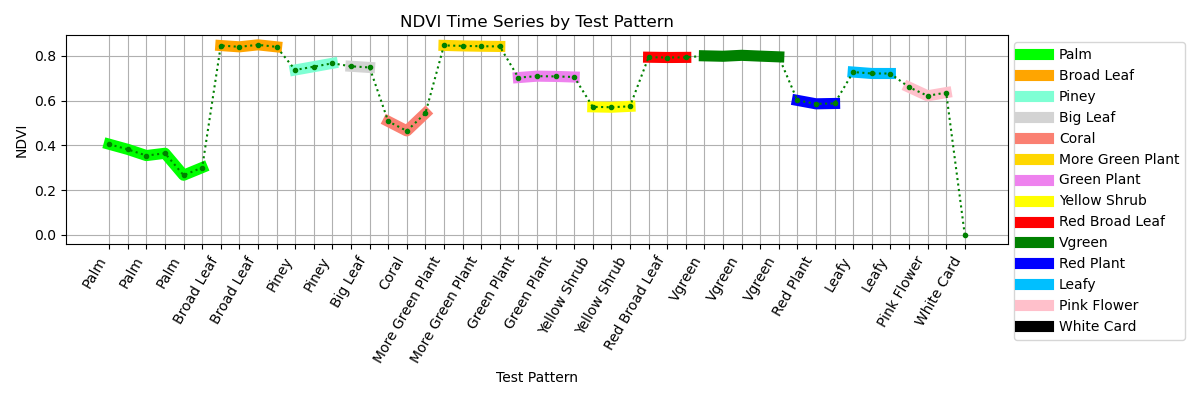

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
plt.figure(figsize=(12, 4))

# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]

    # Plot NDVI values for the current test pattern
    plt.plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=8)

x_labels = df['Test']

plt.plot(df['NDVI'], marker='o', markersize =3,linestyle='dotted', color='green')

# Plot every other x-label
plt.xticks(ticks=range(len(df)), labels=['' if i % 2 != 0 else label for i, label in enumerate(x_labels)], rotation=60, ha='right')

plt.xlabel('Test Pattern')
plt.ylabel('NDVI')
plt.title('NDVI Time Series by Test Pattern')
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.tight_layout()
plt.show()


# Altair NDVI Plots:

In [ ]:
import altair as alt
import panel as pn

alt.data_transformers.disable_max_rows()

#pn.extension('vega')
pn.extension('tabulator')

pn.extension(sizing_mode = 'stretch_width')

import base64, io, IPython
from PIL import Image as PILImage


In [ ]:
# Resize, rotate, and encode images to base64
def resize_rotate_and_encode_image(image_path, size=(250, 250)):
    image = PILImage.open(image_path)
    image = image.resize(size)  # Resize image to the desired size
    image = image.rotate(-90, expand=True)  # Rotate image 90 degrees clockwise
    output = io.BytesIO()
    image.save(output, format='jpeg')  # Use JPEG if you are encoding as jpeg
    encoded_string = "data:image/jpeg;base64," + base64.b64encode(output.getvalue()).decode()
    return encoded_string


df['image'] = df['ImageName'].apply(lambda x: resize_rotate_and_encode_image(x))

alt.HConcatChart(...)
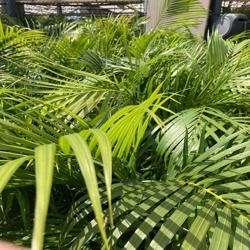
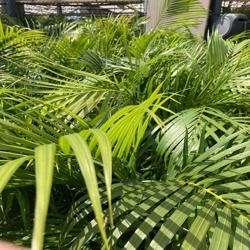
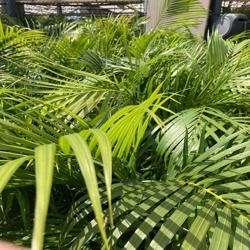
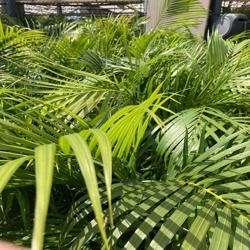
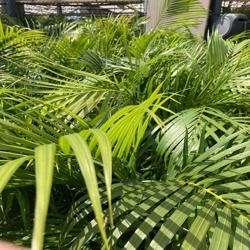
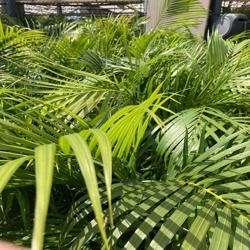
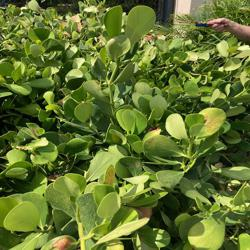
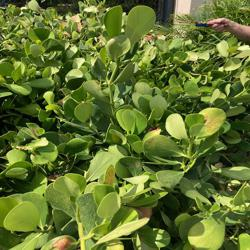
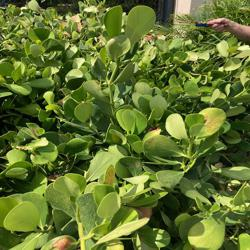
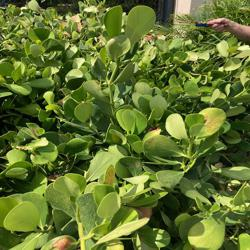
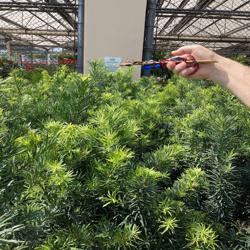
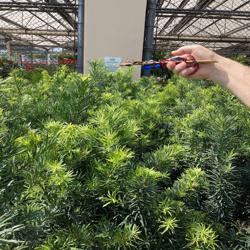
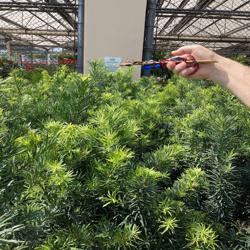
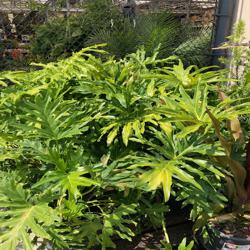
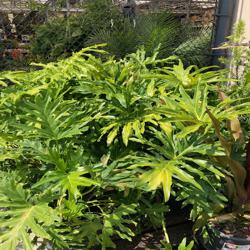
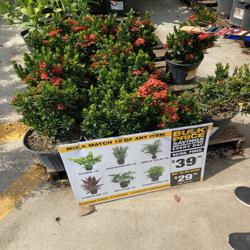
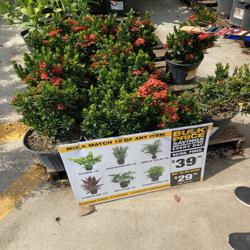
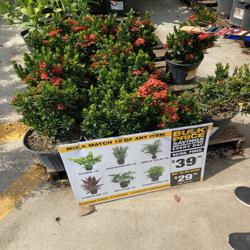
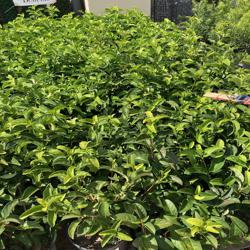
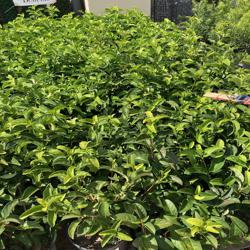
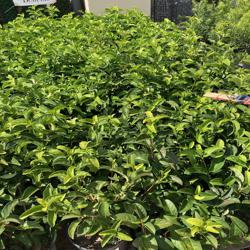
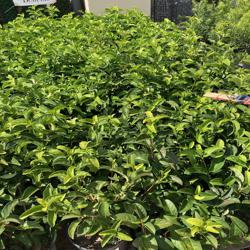
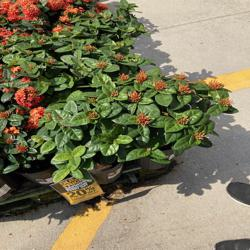
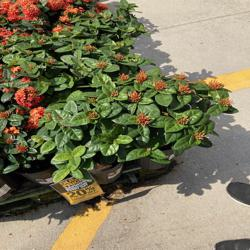
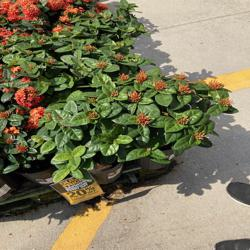
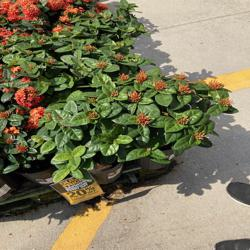
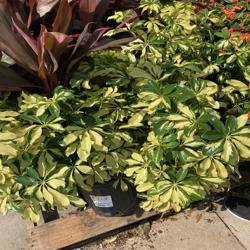
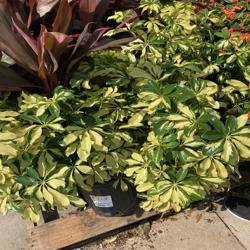
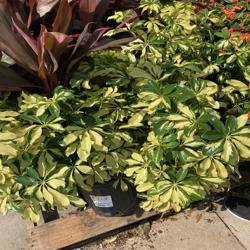
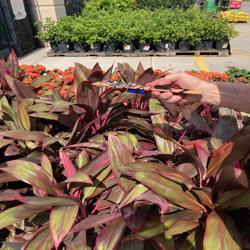
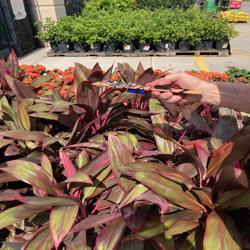
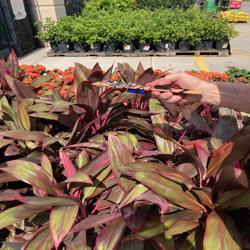
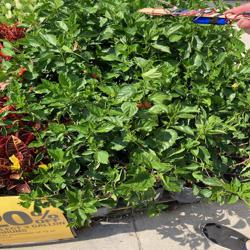
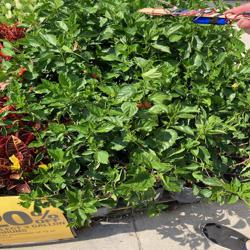
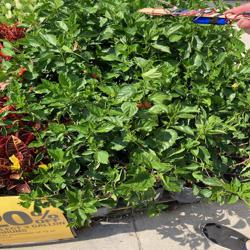
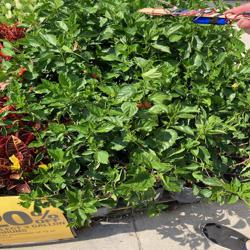
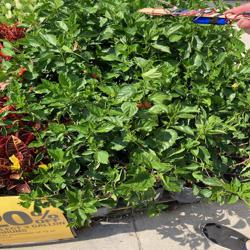
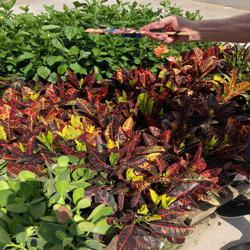
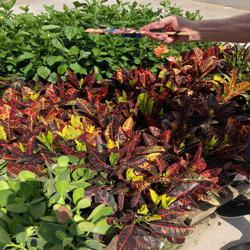
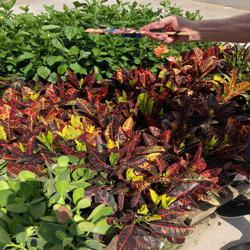
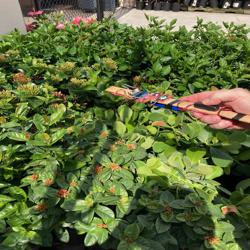
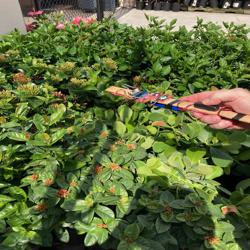
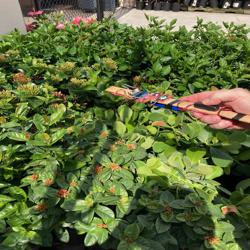
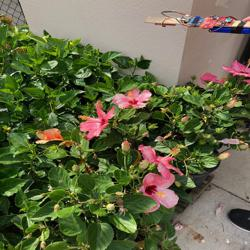
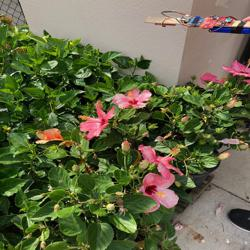
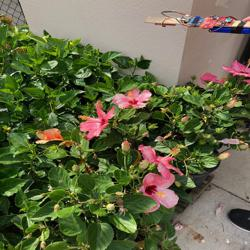
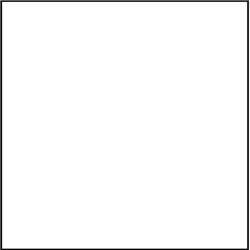

In [ ]:
# Brush for selection
brush = alt.selection_interval()

# Main chart with dots and a dotted line
points = alt.Chart(df).mark_circle(size=200).encode(
    alt.X('Test_number:Q', scale=alt.Scale(domain=(0, 50))),
    alt.Y('NDVI:Q', scale=alt.Scale(domain=(0.0, 1))),
    #color=alt.Color('Test:N', scale=alt.Scale(scheme='tableau20')),  # Vivid colors using tableau20 scheme
    color = alt.Color('Test:N', scale=alt.Scale(domain=list(test_colors.keys()), range=list(test_colors.values()))),
    tooltip=['image:N']
).properties(
    width=1000,
    height=200,
    title='NDVI for each STELLA Reading'
).add_selection(
    brush
)


line1 = alt.Chart(df).mark_line(strokeDash=[5, 5]).encode(
    alt.X('Test_number:Q'),
    alt.Y('NDVI:Q'),
)


line2 = alt.Chart(df).mark_line(strokeDash=[5, 5]).encode(
    alt.X('Test_number:Q'),
    alt.Y('NDVI:Q'),
    #color=alt.Color('Test:N', scale=alt.Scale(scheme='tableau20'))  # Vivid colors for the line
    color = alt.Color('Test:N', scale=alt.Scale(domain=list(test_colors.keys()), range=list(test_colors.values()))),


)

chart = alt.layer(points, line1, line2).resolve_scale(y='shared')

# Image chart
imgs = alt.Chart(df).mark_image(width=50, height=50).encode(
    url='image:N'
).facet(
    alt.Facet('Test:N', title='Select STELLA Reading', header=alt.Header(labelFontSize=0)),
    columns=2
).transform_filter(
    brush
).transform_window(
    row_number='row_number()'
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank < 20
)


# Combine the charts
chart | imgs


alt.LayerChart(...)
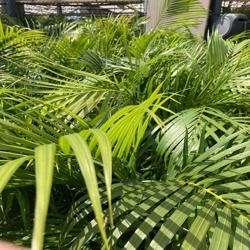
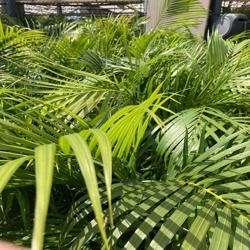
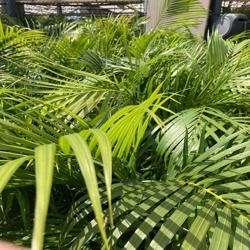
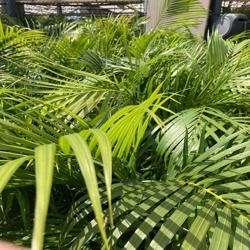
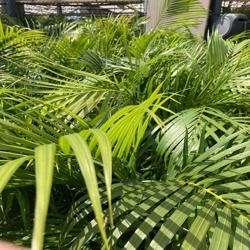
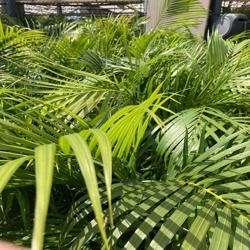
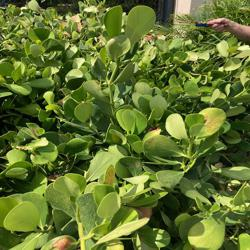
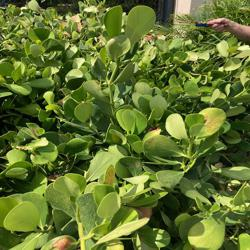
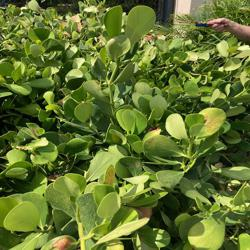
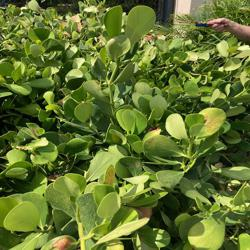
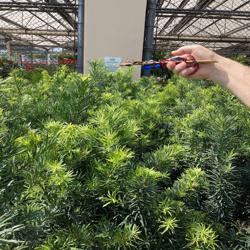
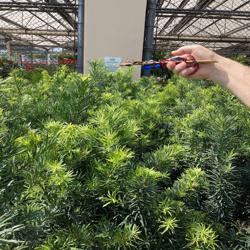
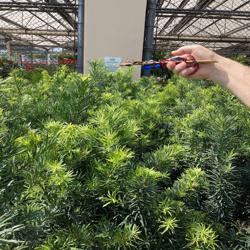
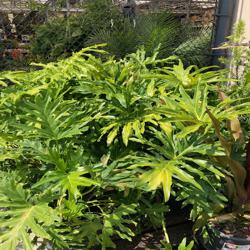
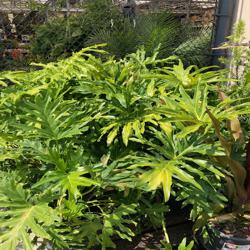
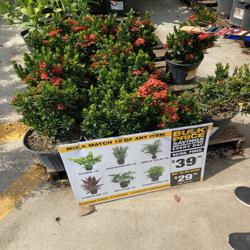
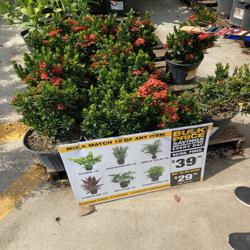
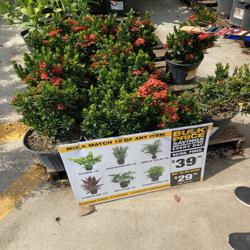
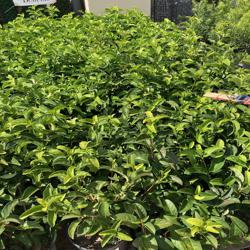
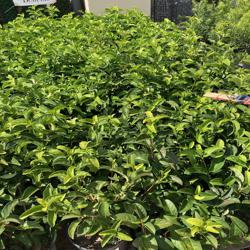
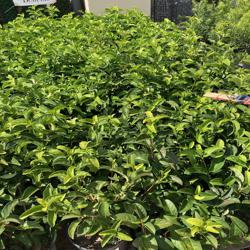
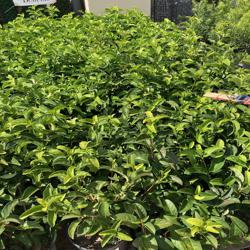
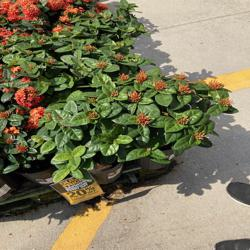
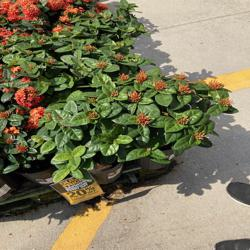
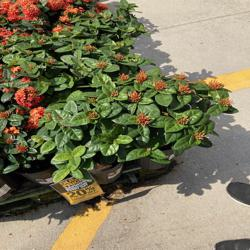
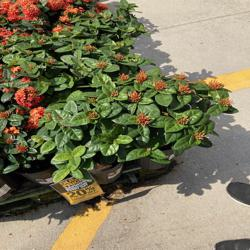
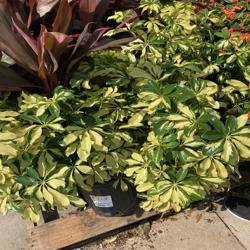
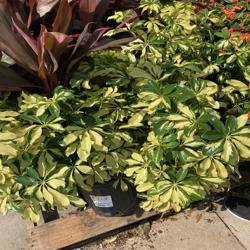
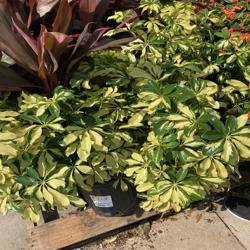
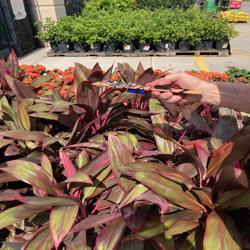
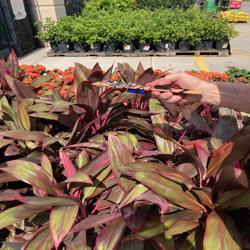
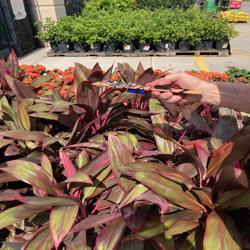
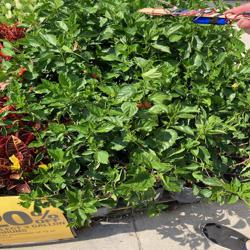
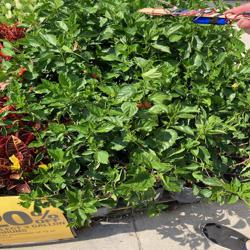
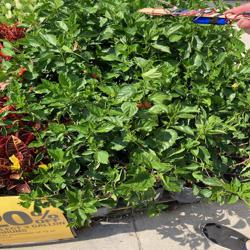
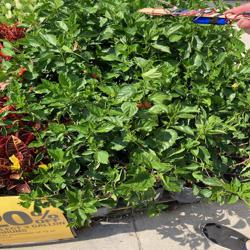
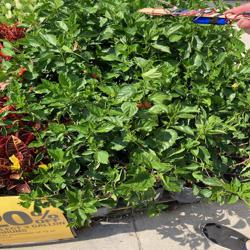
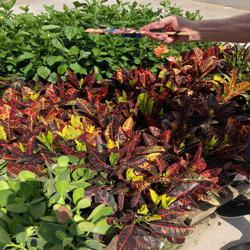
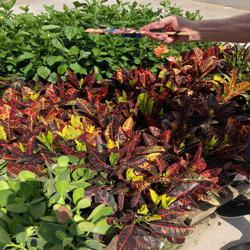
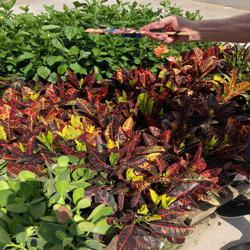
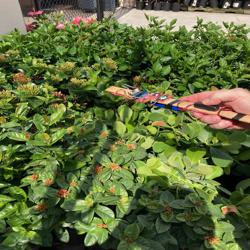
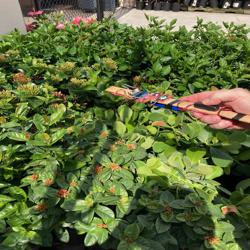
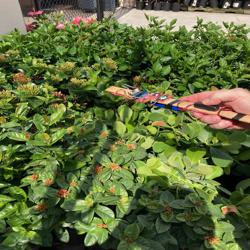
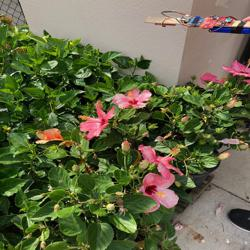
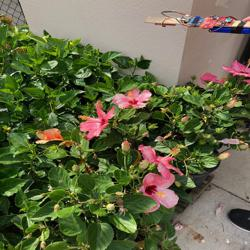
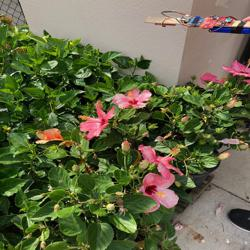
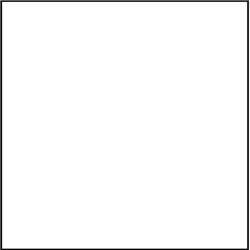

In [ ]:
# Brush for selection
brush = alt.selection_interval()

# Main chart with dots and a dotted line
points = alt.Chart(df).mark_circle(size=200).encode(
    alt.X('Test_number:Q', scale=alt.Scale(domain=(0, 50))),
    alt.Y('NDVI:Q', scale=alt.Scale(domain=(0.0, 1))),
    #color=alt.Color('Test:N', scale=alt.Scale(scheme='tableau20')),  # Vivid colors using tableau20 scheme
    color = alt.Color('Test:N', scale=alt.Scale(domain=list(test_colors.keys()), range=list(test_colors.values()))),
    tooltip=['image:N']
).properties(
    width=1000,
    height=200,
    title='NDVI for each STELLA Reading'
).add_selection(
    brush
)


line1 = alt.Chart(df).mark_line(strokeDash=[5, 5]).encode(
    alt.X('Test_number:Q'),
    alt.Y('NDVI:Q'),
)


line2 = alt.Chart(df).mark_line(strokeDash=[5, 5]).encode(
    alt.X('Test_number:Q'),
    alt.Y('NDVI:Q'),
    #color=alt.Color('Test:N', scale=alt.Scale(scheme='tableau20'))  # Vivid colors for the line
    color = alt.Color('Test:N', scale=alt.Scale(domain=list(test_colors.keys()), range=list(test_colors.values()))),


)

chart = alt.layer(points, line1, line2).resolve_scale(y='shared')

# Image chart
imgs = alt.Chart(df).mark_image(width=50, height=50).encode(
    url='image:N'
).facet(
    alt.Facet('Test:N', title='Select STELLA Reading', header=alt.Header(labelFontSize=0)),
    columns=2
).transform_filter(
    brush
).transform_window(
    row_number='row_number()'
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank < 20
)


# Combine the charts
########chart | imgs
chart

![image.png](attachment:a17953a0-294f-44a9-b8cd-d142ed6e2ad8.png)

## NIRv:

alt.HConcatChart(...)
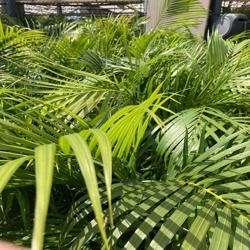
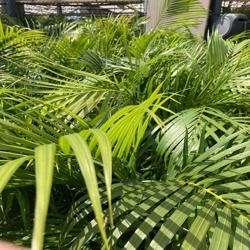
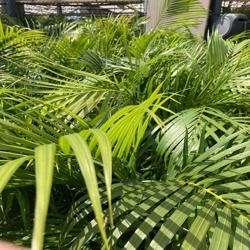
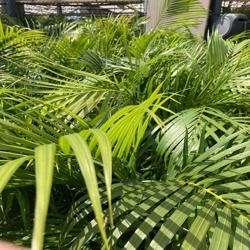
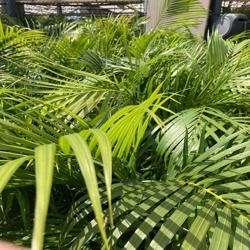
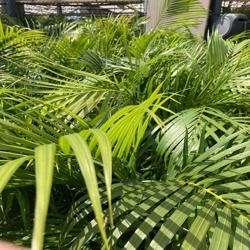
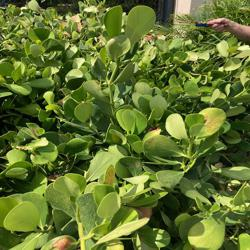
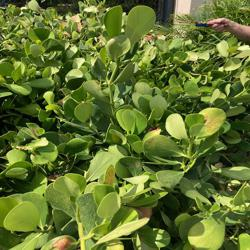
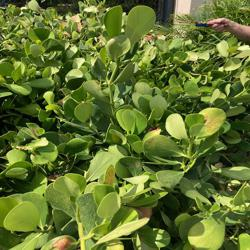
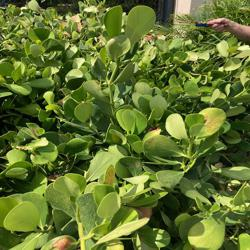
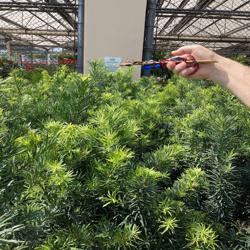
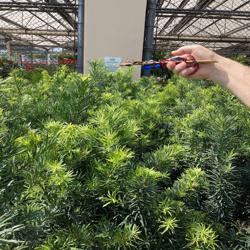
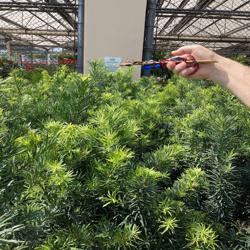
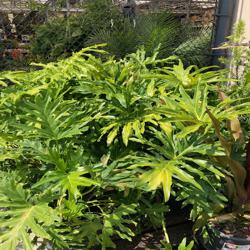
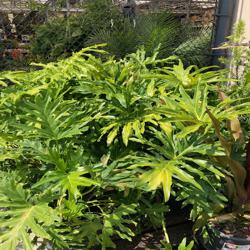
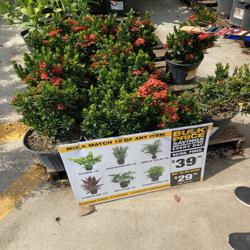
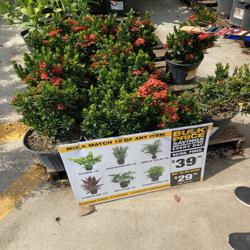
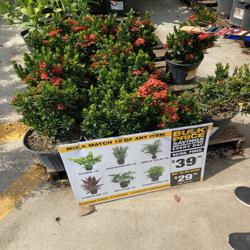
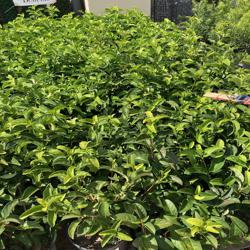
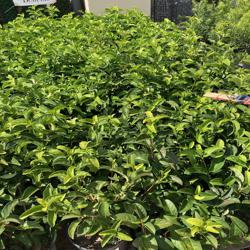
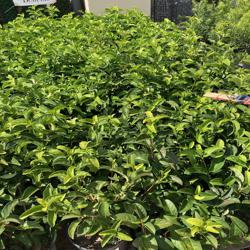
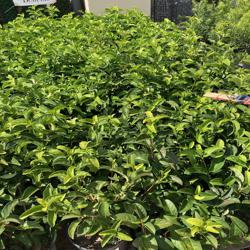
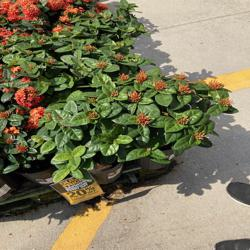
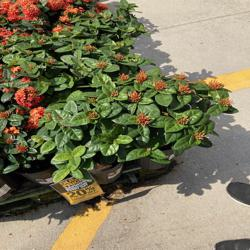
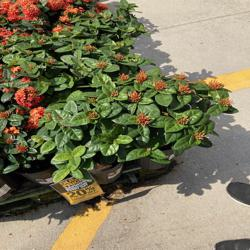
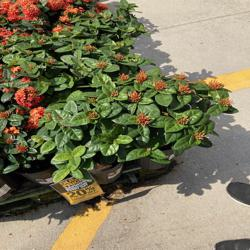
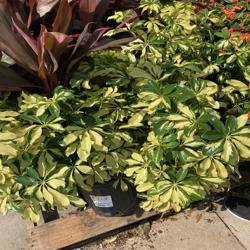
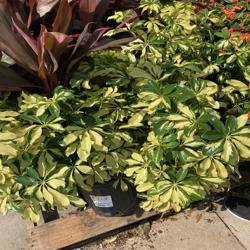
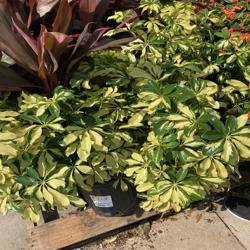
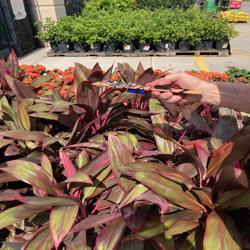
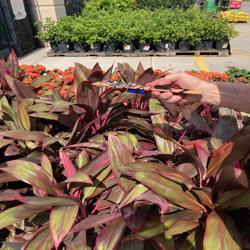
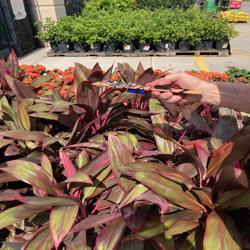
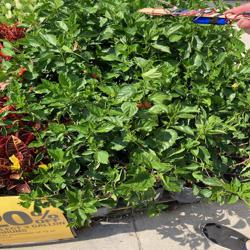
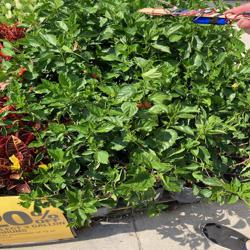
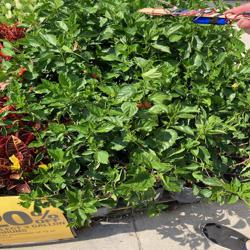
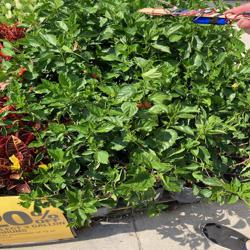
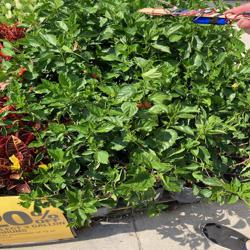
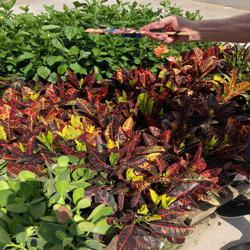
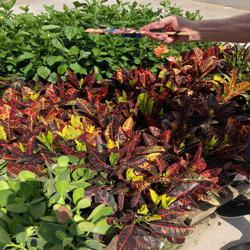
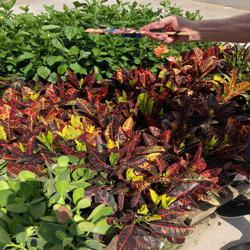
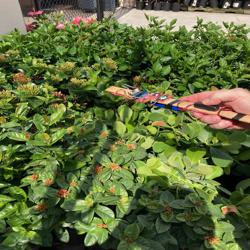
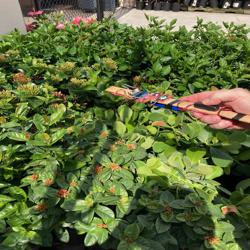
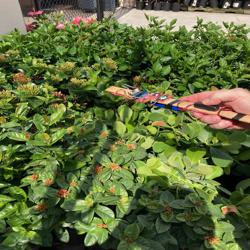
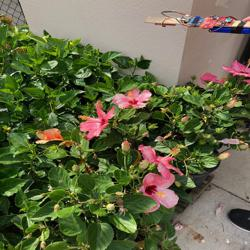
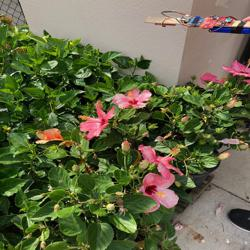
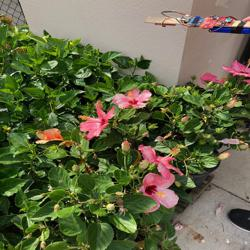
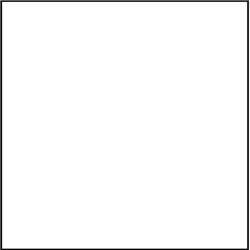

In [ ]:
# Brush for selection
brush = alt.selection_interval()

# Main chart with dots and a dotted line
points = alt.Chart(df).mark_circle(size=200).encode(
    alt.X('Test_number:Q', scale=alt.Scale(domain=(0, 50))),
    alt.Y('NIRv:Q', scale=alt.Scale(domain=(0.0, 1))),
    #color=alt.Color('Test:N', scale=alt.Scale(scheme='tableau20')),  # Vivid colors using tableau20 scheme
    color = alt.Color('Test:N', scale=alt.Scale(domain=list(test_colors.keys()), range=list(test_colors.values()))),
    tooltip=['image:N']
).properties(
    width=1100,
    height=200,
    title='NIRv for each STELLA Reading'
).add_selection(
    brush
)


line1 = alt.Chart(df).mark_line(strokeDash=[5, 5]).encode(
    alt.X('Test_number:Q'),
    alt.Y('NIRv:Q'),
)


line2 = alt.Chart(df).mark_line(strokeDash=[5, 5]).encode(
    alt.X('Test_number:Q'),
    alt.Y('NIRv:Q'),
    #color=alt.Color('Test:N', scale=alt.Scale(scheme='tableau20'))  # Vivid colors for the line
    color = alt.Color('Test:N', scale=alt.Scale(domain=list(test_colors.keys()), range=list(test_colors.values()))),


)

chart = alt.layer(points, line1, line2).resolve_scale(y='shared')

# Image chart
imgs = alt.Chart(df).mark_image(width=50, height=50).encode(
    url='image:N'
).facet(
    alt.Facet('Test:N', title='Select STELLA Reading', header=alt.Header(labelFontSize=0)),
    columns=2
).transform_filter(
    brush
).transform_window(
    row_number='row_number()'
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank < 5
)


# Combine the charts
chart | imgs

![image.png](attachment:45c5341e-aa3c-453d-b9fe-acf41229ef31.png)